In [1]:
#Importing libraries and setting the path

import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [9]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
path = "F:\\UpGrad_ML\\Course 4 Machine Learning-2\\2 Assignment - Advanced Regression\\"

In [11]:
property_df = pd.read_csv(path + "train.csv")

In [12]:
property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
pd.set_option('display.max_columns', 250)
property_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Cleaning

#### Imputing values in columns that have null values

#### Note:
    Use a common 'None' value as this will help with label encoding later on

In [14]:
#Replacing NA with 'None' in Alley column

property_df.loc[property_df['Alley'].isnull(), 'Alley'] = 'None'
property_df['Alley'].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [15]:
#Replacing NA with 'None' in FireplaceQu column

property_df.loc[property_df['FireplaceQu'].isnull(), 'FireplaceQu'] = 'None'
property_df['FireplaceQu'].value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [16]:
#Replacing NA with 'None' in PoolQC column

property_df.loc[property_df['PoolQC'].isnull(), 'PoolQC'] = 'None'
property_df['PoolQC'].value_counts()

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [17]:
#Replacing NA with 'None' in Fence column

property_df.loc[property_df['Fence'].isnull(), 'Fence'] = 'None'
property_df['Fence'].value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [18]:
#Replacing NA with 'None' in MiscFeature column

property_df.loc[property_df['MiscFeature'].isnull(), 'MiscFeature'] = 'None'
property_df['MiscFeature'].value_counts()

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [19]:
#Checking the missing values in the LotFrontage column

property_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [20]:
property_df['LotFrontage'].mean()

70.04995836802665

In [21]:
#Imputing missing values in the column with the mean value, as it's very close to the median value

property_df.loc[property_df['LotFrontage'].isnull(), 'LotFrontage'] = round(property_df['LotFrontage'].mean(), 1)

In [22]:
#Imputing missing values in the MasVnrType column with the mode value

property_df.loc[property_df['MasVnrType'].isnull(), 'MasVnrType'] = 'None'
property_df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [23]:
#Imputing missing values in the MasVnrArea column with the median value, as it's more representative of the column

property_df.loc[property_df['MasVnrArea'].isnull(), 'MasVnrArea'] = 0.0
property_df['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [24]:
#Checking the missing values in the BsmtQual column

property_df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [25]:
#Replacing the levels in the BsmtQual column with a numerical value, since each category in the column 
#represents a range of numerical values

property_df.loc[property_df['BsmtQual'].isnull(), 'BsmtQual'] = 0
property_df.loc[property_df['BsmtQual'] == "Po", 'BsmtQual'] = 65
property_df.loc[property_df['BsmtQual'] == "Fa", 'BsmtQual'] = 75
property_df.loc[property_df['BsmtQual'] == "TA", 'BsmtQual'] = 85
property_df.loc[property_df['BsmtQual'] == "Gd", 'BsmtQual'] = 95
property_df.loc[property_df['BsmtQual'] == "Ex", 'BsmtQual'] = 105

#Converting the column to a numeric data type

property_df['BsmtQual'] = pd.to_numeric(property_df['BsmtQual'])

property_df['BsmtQual'].value_counts()

85     649
95     618
105    121
0       37
75      35
Name: BsmtQual, dtype: int64

In [26]:
#Imputing missing values in the BsmtCond column with "None"

property_df.loc[property_df['BsmtCond'].isnull(), 'BsmtCond'] = 'None'
property_df['BsmtCond'].value_counts()

TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64

In [27]:
#Imputing missing values in the BsmtExposure column with "None"

property_df.loc[property_df['BsmtExposure'].isnull(), 'BsmtExposure'] = 'None'
property_df['BsmtExposure'].value_counts()

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64

In [28]:
#Imputing missing values in the BsmtFinType1 column with "None"

property_df.loc[property_df['BsmtFinType1'].isnull(), 'BsmtFinType1'] = 'None'
property_df['BsmtFinType1'].value_counts()

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [29]:
#Imputing missing values in the BsmtFinType2 column with "None"

property_df.loc[property_df['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'None'
property_df['BsmtFinType2'].value_counts()

Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64

In [30]:
#Imputing missing values in the Electrical column with the mode value

property_df.loc[property_df['Electrical'].isnull(), 'Electrical'] = 'SBrkr'
property_df['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [31]:
#Imputing missing values in the GarageType column with "None"

property_df.loc[property_df['GarageType'].isnull(), 'GarageType'] = 'None'
property_df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [32]:
#Imputing missing values in the GarageFinish column with "None"

property_df.loc[property_df['GarageFinish'].isnull(), 'GarageFinish'] = 'None'
property_df['GarageFinish'].value_counts()

Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64

In [33]:
#Imputing missing values in the GarageQual column with "None"

property_df.loc[property_df['GarageQual'].isnull(), 'GarageQual'] = 'None'
property_df['GarageQual'].value_counts()

TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64

In [34]:
#Imputing missing values in the GarageCond column with "None"

property_df.loc[property_df['GarageCond'].isnull(), 'GarageCond'] = 'None'
property_df['GarageCond'].value_counts()

TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

In [35]:
#Checking the missing values in the GarageYrBlt column

property_df['GarageYrBlt'].isnull().sum()

81

In [36]:
#Imputing missing values in the GarageYrBlt column with the mean value

#Note: rounding to zero still results in one decimal number (zero), but the value is rounded up/down as necessary

property_df.loc[property_df['GarageYrBlt'].isnull(), 'GarageYrBlt'] = round(property_df['GarageYrBlt'].mean(), 0)
property_df['GarageYrBlt'].isnull().sum()

0

## Data Preparation

#### Converting columns to appropriate data types

In [37]:
#Converting the GarageYrBlt column to an integer type variable, to remove all the zeros at the end

property_df['GarageYrBlt'] = property_df['GarageYrBlt'].astype(int)

#Converting the column to a string type variable, as strptime() accepts only strings

property_df['GarageYrBlt'] = property_df['GarageYrBlt'].astype(str)

In [38]:
property_df['GarageYrBlt'].head()

0    2003
1    1976
2    2001
3    1998
4    2000
Name: GarageYrBlt, dtype: object

In [39]:
#Converting to a datetime object and extracting only the year

property_df['GarageYrBlt'] = property_df['GarageYrBlt'].apply(lambda x: datetime.strptime(x, "%Y"))

#Note: Do not extract the year now, as that will convert the column to an int type.

In [40]:
property_df['GarageYrBlt'].dtypes

dtype('<M8[ns]')

In [41]:
#Converting the YearBuilt, YearRemodAdd, and YrSold columns into datetime objects

property_df['YearBuilt'] = property_df['YearBuilt'].apply(lambda x: datetime.strptime(str(x), "%Y"))
property_df['YearRemodAdd'] = property_df['YearRemodAdd'].apply(lambda x: datetime.strptime(str(x), "%Y"))
property_df['YrSold'] = property_df['YrSold'].apply(lambda x: datetime.strptime(str(x), "%Y"))

In [42]:
property_df[['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,YrSold,GarageYrBlt
0,2003-01-01,2003-01-01,2008-01-01,2003-01-01
1,1976-01-01,1976-01-01,2007-01-01,1976-01-01
2,2001-01-01,2002-01-01,2008-01-01,2001-01-01
3,1915-01-01,1970-01-01,2006-01-01,1998-01-01
4,2000-01-01,2000-01-01,2008-01-01,2000-01-01


In [43]:
#Calculating the age of the building, the remodeling, and the garage

property_df['BuildingAge'] = property_df.apply(lambda x: relativedelta(x.YrSold, x.YearBuilt), axis=1)
property_df['BuildingAge'] = property_df['BuildingAge'].apply(lambda x: x.years)

property_df['RemodAge'] = property_df.apply(lambda x: relativedelta(x.YrSold, x.YearRemodAdd), axis=1)
property_df['RemodAge'] = property_df['RemodAge'].apply(lambda x: x.years)

property_df['GarageAge'] = property_df.apply(lambda x: relativedelta(x.YrSold, x.GarageYrBlt), axis=1)
property_df['GarageAge'] = property_df['GarageAge'].apply(lambda x: x.years)

In [44]:
property_df[['BuildingAge', 'RemodAge', 'GarageAge']].head()

,BuildingAge,RemodAge,GarageAge
0,5,5,5
1,31,31,31
2,7,6,7
3,91,36,8
4,8,8,8


In [45]:
#Converting the YrSold column back to an int type

property_df['YrSold'] = property_df['YrSold'].apply(lambda x: int(x.year))

In [46]:
#Dropping the YearBuilt, YearRemodAdd, and GarageYrBlt columns as derived metrics have been created from these variables

property_df = property_df.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1)

In [47]:
property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [48]:
#Dropping the Id column as we don't need it

property_df = property_df.drop(['Id'], axis=1)

In [49]:
#Creating a list of all the numerical columns

numerical_columns = ['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                     'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                     'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                     'MiscVal', 'MoSold', 'YrSold', 'BuildingAge', 'RemodAge', 'GarageAge']

In [50]:
len(numerical_columns)

34

In [51]:
#Splitting the list of numerical columns into four lists, to make it easier to visualize the data

numerical_columns_1 = numerical_columns[0:9]
numerical_columns_2 = numerical_columns[9:17]
numerical_columns_2.append(numerical_columns[0])
numerical_columns_3 = numerical_columns[17:26]
numerical_columns_3.append(numerical_columns[0])
numerical_columns_4 = numerical_columns[26:34]
numerical_columns_4.append(numerical_columns[0])

print(len(numerical_columns_1))
print(len(numerical_columns_2))
print(len(numerical_columns_3))
print(len(numerical_columns_4))

9
9
10
9


#### Visualizing the numerical columns to check if any of them are of a recognizable function (so that they can be transformed)

In [52]:
#Saving the graphs in files to reduce the execution time of this python notebook

fig1 = sns.pairplot(property_df[numerical_columns_1])
fig1.savefig('pairplot_1.jpg')
plt.close()

In [53]:
fig2 = sns.pairplot(property_df[numerical_columns_2])
fig2.savefig('pairplot_2.jpg')
plt.close()

In [54]:
fig3 = sns.pairplot(property_df[numerical_columns_3])
fig3.savefig('pairplot_3.jpg')
plt.close()

In [55]:
fig4 = sns.pairplot(property_df[numerical_columns_4])
fig4.savefig('pairplot_4.jpg')
plt.close()

#### Creating a copy of the dataframe

In [56]:
housing_df1 = property_df.copy()

In [57]:
housing_df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BuildingAge,RemodAge,GarageAge
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,95,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,5,5,5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,95,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,31,31,31
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,95,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,7,6,7
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,85,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,91,36,8
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,95,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,8,8,8


### Using Label Encoding

#### Using LabelEncoder for variables with two levels

In [58]:
#Creating an object of the LabelEncoder class

le = LabelEncoder()

In [59]:
housing_df1['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [60]:
housing_df1['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [61]:
#Doing both the fit and transform steps together as the data hasn't been split yet

housing_df1['Street'] = le.fit_transform(housing_df1['Street'])
housing_df1['CentralAir'] = le.fit_transform(housing_df1['CentralAir'])

In [62]:
housing_df1['Street'].value_counts()

1    1454
0       6
Name: Street, dtype: int64

In [63]:
housing_df1['CentralAir'].value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

##### Noting this encoding:
    In Street, 1 stands for paved and 0 stands for gravel
    In CentralAir, 1 stands for yes and 0 stands for no

#### Manually encoding ordinal variables

In [64]:
#Defining the mapping function

def level_map(x):
    return x.map({"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})

#Creating a list of variables for whom this mapping applies
cat_var_list = ['ExterQual', 'ExterCond', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

In [65]:
# Applying the function to the housing list

housing_df1[cat_var_list] = housing_df1[cat_var_list].apply(level_map)

In [66]:
housing_df1[cat_var_list].head()

,ExterQual,ExterCond,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,4,3,3,5,4,0,3,3,0
1,3,3,3,5,3,3,3,3,0
2,4,3,3,5,4,3,3,3,0
3,3,3,4,4,4,4,3,3,0
4,4,3,3,5,4,3,3,3,0


In [67]:
#Mapping the other variables that have different level names

housing_df1['LandSlope'] = housing_df1['LandSlope'].map({"Gtl" : 1, "Mod" : 2, "Sev" : 3})
housing_df1['BsmtExposure'] = housing_df1['BsmtExposure'].map({"None" : 0, "No" : 1, "Mn" : 2, "Av" : 3, "Gd" : 4})
housing_df1['BsmtFinType1'] = housing_df1['BsmtFinType1'].map({"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6})
housing_df1['BsmtFinType2'] = housing_df1['BsmtFinType2'].map({"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6})
housing_df1['Functional'] = housing_df1['Functional'].map({"Sal":0, "Sev":1, "Maj2":2, "Maj1":3, "Mod":4, "Min2":5, "Min1":6, "Typ":7})
housing_df1['GarageFinish'] = housing_df1['GarageFinish'].map({"None":0, "Unf":1, "RFn":2, "Fin":3}).value_counts()

### Using OneHotEncoder

In [68]:
#Creating an object of the OneHotEncoder class

enc = OneHotEncoder()

In [69]:
#Using OneHotEncoder for variables with three levels

onehotlabels = enc.fit_transform(housing_df1[['Alley', 'LandSlope', 'PavedDrive']])

#Using the original column names to make the encoded columns easier to read

col_names = enc.get_feature_names(['Alley', 'LandSlope', 'PavedDrive'])

In [70]:
#Converting the encoded columns into a dataframe

encoded_columns = pd.DataFrame(onehotlabels.toarray().astype(int), columns = col_names)
encoded_columns.columns

Index(['Alley_Grvl', 'Alley_None', 'Alley_Pave', 'LandSlope_1', 'LandSlope_2',
       'LandSlope_3', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y'],
      dtype='object')

In [71]:
#Dropping some columns since we only need n-1 columns to represent n levels

encoded_columns = encoded_columns.drop(['Alley_None', 'LandSlope_3', 'PavedDrive_N'], axis =1)

In [72]:
encoded_columns.shape

(1460, 6)

In [73]:
housing_df1.shape

(1460, 80)

#### Merging these encoded columns with the original dataframe

In [74]:
housing_df1 = pd.concat([housing_df1, encoded_columns], axis = 1)

In [75]:
#Dropping the columns that have been encoded

housing_df1 = housing_df1.drop(['Alley', 'LandSlope', 'PavedDrive'], axis = 1)

### Splitting into train and test sets

In [76]:
#Splitting the data 70-30

h1_train, h1_test = train_test_split(housing_df1, train_size = 0.7, test_size = 0.3, random_state = 100)

### Using Frequency Encoder

In [77]:
#Creating a list of variables for frequency encoding 

variables_freq_enc = ['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 
                      'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                      'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'Heating', 
                      'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'Fence', 'MiscFeature', 'SaleType', 
                      'SaleCondition', 'MSSubClass']

len(variables_freq_enc)

30

In [78]:
#Using CountEncoder for frequency encoding

count_encoder = ce.CountEncoder(cols= variables_freq_enc)
h1_train[variables_freq_enc] = count_encoder.fit_transform(h1_train[variables_freq_enc])

In [79]:
h1_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BuildingAge,RemodAge,GarageAge,Alley_Grvl,Alley_Pave,LandSlope_1,LandSlope_2,PavedDrive_P,PavedDrive_Y
210,43,802,67.0,5604,1,648,914,1020,726,77,872,1008,839,503,5,6,812,1003,21,21,608,0.0,3,3,439,85,3,648,89,2,873,0,396,864,998,3,0,64,864,0,0,864,1,0,1,0,2,1,3,5,955,0,0,58,1017,0,0,0,0,0,0,96,0,0,0,0,836,982,0,4,2008,889,843,98000,83,58,29,0,0,1,0,0,1
318,200,802,90.0,9900,1,648,29,1020,726,34,872,1008,839,308,7,5,812,1003,158,146,309,256.0,4,3,461,95,3,101,304,1,873,0,360,1347,998,5,1,933,1372,1274,0,2646,1,0,2,1,4,1,4,9,955,1,3,601,1017,3,656,3,3,340,60,144,0,0,0,0,836,982,0,4,2009,889,843,260000,16,16,16,0,0,0,1,0,1
239,103,802,52.0,8741,1,648,914,1020,726,77,872,1008,839,111,6,4,812,1003,348,340,608,0.0,3,3,439,85,2,648,48,1,873,0,641,735,998,3,1,64,798,689,0,1487,0,0,1,1,3,1,3,7,955,1,4,275,1017,1,220,3,3,0,140,0,0,0,0,0,107,982,0,4,2010,889,843,113000,65,60,61,0,0,1,0,0,1
986,103,154,59.0,5310,1,648,914,1020,196,79,58,1008,839,111,6,8,190,1003,348,340,608,0.0,3,4,439,85,2,648,291,320,873,0,485,485,998,4,1,933,1001,634,0,1635,0,0,1,0,2,1,4,5,955,0,0,601,1017,1,255,2,3,394,0,0,0,0,0,0,836,982,0,6,2006,889,843,117000,96,3,56,0,0,1,0,0,1
1416,25,154,60.0,11340,1,648,914,1020,726,79,872,1008,25,308,4,6,812,1003,348,13,608,0.0,3,3,461,85,3,648,291,320,873,0,777,777,998,4,1,933,1246,1044,0,2290,0,0,2,0,4,2,3,11,955,0,0,275,1017,2,560,3,3,0,0,114,0,0,0,0,836,982,0,4,2010,889,843,122500,125,60,39,0,0,1,0,0,0


### Rescaling the Features

In [80]:
#Creating an object of the MinMaxScaler class

scaler = MinMaxScaler()

In [81]:
#Creating a list of continuous variables for MinMaxScaling

variables_minmax = list(h1_train.columns)
variables_minmax.remove('SalePrice')
len(variables_minmax)

82

In [82]:
#Creating a list of variables that have already been scaled (they only contain 0 and 1)

already_scaled = ['Street', 'CentralAir', 'Alley_Grvl', 'Alley_Pave', 'LandSlope_1', 'LandSlope_2', 'PavedDrive_P', 
                  'PavedDrive_Y']
len(already_scaled)

8

In [83]:
#Creating a list of variables that need to be scaled

variables_minmax = list(set(variables_minmax)-set(already_scaled))
len(variables_minmax)

74

Note: Even the variables that have been through frequency encoding will have to be scaled again. This is because coefficient value is a way of variable elimination in lasso regression. All the predictor variables need to be of the same scale for this to be meaningful.

In [84]:
#Performing fit and transform together here; the transform function will be applied separately to the test set

h1_train[variables_minmax] = scaler.fit_transform(h1_train[variables_minmax])

In [85]:
h1_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BuildingAge,RemodAge,GarageAge,Alley_Grvl,Alley_Pave,LandSlope_1,LandSlope_2,PavedDrive_P,PavedDrive_Y
210,0.110193,1.000000,0.157534,0.019306,1,1.0,1.0,1.0,1.000000,0.493506,1.000000,1.0,1.0,1.000000,0.444444,0.625,1.000000,1.0,0.057637,0.058997,1.0,0.00,0.333333,0.333333,0.95207,0.809524,0.75,1.000000,0.218182,0.003135,1.0,0.0,0.169521,0.141408,1.0,0.50,0,0.065591,0.113889,0.000000,0.0,0.081860,0.333333,0.0,0.333333,0.0,0.250,0.0,0.333333,0.181818,1.0,0.000000,0.0,0.091973,1.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.272727,0.50,1.0,1.0,98000,0.610294,0.967213,0.271028,0,0,1,0,0,1
318,0.542700,1.000000,0.236301,0.039403,1,1.0,0.0,1.0,1.000000,0.214286,1.000000,1.0,1.0,0.609218,0.666667,0.500,1.000000,1.0,0.452450,0.427729,0.5,0.16,0.666667,0.333333,1.00000,0.904762,0.75,0.114887,1.000000,0.000000,1.0,0.0,0.154110,0.220458,1.0,1.00,1,1.000000,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,0.666667,0.545455,1.0,0.333333,0.6,1.000000,1.0,0.75,0.462623,0.6,0.6,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.272727,0.75,1.0,1.0,260000,0.117647,0.278689,0.149533,0,0,0,1,0,1
239,0.275482,1.000000,0.106164,0.033981,1,1.0,1.0,1.0,1.000000,0.493506,1.000000,1.0,1.0,0.214429,0.555556,0.375,1.000000,1.0,1.000000,1.000000,1.0,0.00,0.333333,0.333333,0.95207,0.809524,0.50,1.000000,0.069091,0.000000,1.0,0.0,0.274401,0.120295,1.0,0.50,1,0.065591,0.098611,0.333656,0.0,0.201576,0.000000,0.0,0.333333,0.5,0.375,0.0,0.333333,0.363636,1.0,0.333333,0.8,0.454849,1.0,0.25,0.155148,0.6,0.6,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,0.120627,1.0,0.0,0.272727,1.00,1.0,1.0,113000,0.477941,1.000000,0.570093,0,0,1,0,0,1
986,0.275482,0.184906,0.130137,0.017931,1,1.0,1.0,1.0,0.266943,0.506494,0.064368,1.0,1.0,0.214429,0.555556,0.875,0.232099,1.0,1.000000,1.000000,1.0,0.00,0.333333,0.666667,0.95207,0.809524,0.50,1.000000,0.952727,1.000000,1.0,0.0,0.207620,0.079378,1.0,0.75,1,1.000000,0.145602,0.307022,0.0,0.230015,0.000000,0.0,0.333333,0.0,0.250,0.0,0.666667,0.181818,1.0,0.000000,0.0,1.000000,1.0,0.25,0.179831,0.4,0.6,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.454545,0.00,1.0,1.0,117000,0.705882,0.065574,0.523364,0,0,1,0,0,1
1416,0.060606,0.184906,0.133562,0.046139,1,1.0,1.0,1.0,1.000000,0.506494,1.000000,1.0,0.0,0.609218,0.333333,0.625,1.000000,1.0,1.000000,0.035398,1.0,0.00,0.333333,0.333333,1.00000,0.809524,0.75,1.000000,0.952727,1.000000,1.0,0.0,0.332620,0.127169,1.0,0.75,1,1.000000,0.202315,0.505569,0.0,0.355880,0.000000,0.0,0.666667,0.0,0.500,0.5,0.333333,0.727273,1.0,0.000000,0.0,0.454849,1.0,0.50,0.394922,0.6,0.6,0.000000,0.000000,0.206522,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.272727,1.00,1.0,1.0,122500,0.919118,1.000000,0.364486,0,0,1,0,0,0


### Transforming the target variable

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

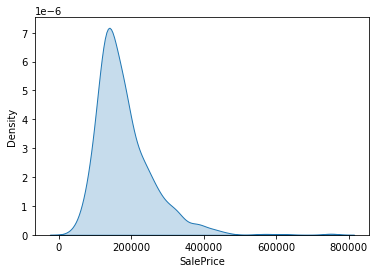

In [88]:
#Let's look at the distribution of the target variable

sns.kdeplot(h1_train['SalePrice'], shade=True)

This is not close to a normal distribution (which is required for LR).

In [89]:
#Creating an object of the PowerTransformer class and using the box-cox transformation 
#This is to bring the SalePrice column closer to a normal distribution

pt = PowerTransformer(method='box-cox')

In [90]:
#Tranforming the variable so that it has mean = 0 and sd = 1
#Using pd.DataFrame as the input needs to be of the shape (n, 1) and not (n, )

h1_train['SalePrice'] = pt.fit_transform(pd.DataFrame(h1_train['SalePrice']))

In [91]:
h1_train['SalePrice'].head()

210    -1.355991
318     1.122155
239    -0.977331
986    -0.885749
1416   -0.765350
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

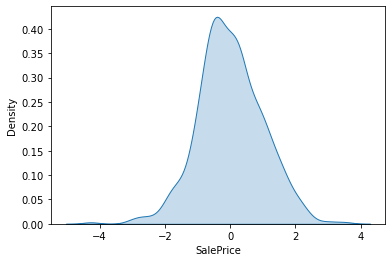

In [92]:
#Plotting the target variable after the transformation

sns.kdeplot(h1_train['SalePrice'], shade=True)

This is much closer to a normal distribution.

## Model Building

#### Splitting the training data into h1_X_train and h1_y_train

In [88]:
#Using the pop() function helps as all the predictor variables are left in the df

h1_y_train = h1_train.pop('SalePrice')

In [89]:
h1_X_train = h1_train.copy()

In [90]:
h1_X_train.shape

(1021, 82)

### Ridge Regression

In [91]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


#Performing grid search to tune the alpha value

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs = -1)            
model_cv_ridge.fit(h1_X_train, h1_y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:   24.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [92]:
#Creating a dataframe that contains the results of the cross-validation

cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge = cv_results_ridge[cv_results_ridge['param_alpha']<=100]

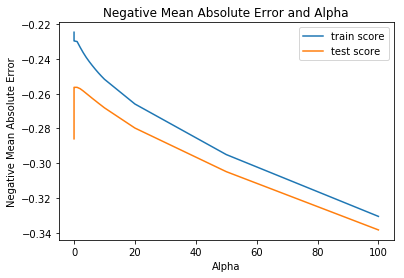

In [93]:
#Plotting mean test and train scores against alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')

#Plotting the lines
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel("Alpha")
plt.ylabel("Negative Mean Absolute Error")
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [94]:
#Checking for the alpha value that gives the least mean_test_score

cv_results_ridge.sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
12,0.004735,0.006275,0.006305,0.007723,0,{'alpha': 0.9},-0.250210,-0.271256,-0.271607,-0.237150,-0.251338,-0.256306,0.013310,1,-0.237880,-0.215148,-0.222808,-0.236450,-0.235723,-0.229602,0.009033
13,0.012801,0.006399,0.003200,0.003919,1,{'alpha': 1.0},-0.249719,-0.271480,-0.271696,-0.237113,-0.251575,-0.256310,0.013420,2,-0.238120,-0.215665,-0.223183,-0.236746,-0.236025,-0.229948,0.008941
11,0.009600,0.003198,0.003210,0.006420,0,{'alpha': 0.8},-0.250754,-0.271027,-0.271540,-0.237215,-0.251188,-0.256339,0.013188,3,-0.237632,-0.214596,-0.222474,-0.236153,-0.235418,-0.229255,0.009128
10,0.008001,0.000002,0.006401,0.003201,0,{'alpha': 0.7},-0.251412,-0.270861,-0.271459,-0.237287,-0.251050,-0.256409,0.013069,4,-0.237367,-0.214026,-0.222164,-0.235846,-0.235119,-0.228904,0.009222
9,0.009601,0.003201,0.004800,0.003919,0,{'alpha': 0.6},-0.252122,-0.270691,-0.271414,-0.237418,-0.250985,-0.256522,0.012937,5,-0.237091,-0.213461,-0.221877,-0.235591,-0.234824,-0.228569,0.009317


In [95]:
#Fitting the ridge regression model with the optimal alpha value

alpha = 0.9
ridge = Ridge(alpha=alpha)

ridge.fit(h1_X_train, h1_y_train)
ridge.coef_

array([ 0.10974177,  0.15649004, -0.0221761 ,  0.54718318,  0.2833383 ,
       -0.04108705,  0.05858973,  0.32710377, -0.02638874, -0.04468191,
        0.1422342 ,  0.19046818,  0.07336388, -0.02350767,  1.48103765,
        0.71763232, -0.06474269,  0.07015077, -0.0442352 ,  0.11913842,
        0.02331348,  0.01558286,  0.12094937, -0.05323357,  0.05877923,
        0.13215502, -0.04500441, -0.08718097,  0.09791525, -0.15861338,
        0.02659274,  0.12585338,  0.07725265,  0.18434606, -0.09382522,
        0.15275104,  0.16866982, -0.0041158 ,  1.03914174,  0.3092377 ,
        0.13040584,  0.99823735,  0.43212684,  0.06030275,  0.38901521,
        0.14002507,  0.2249332 ,  0.00700307,  0.21514142,  0.41570896,
        0.12444534,  0.0518548 ,  0.21583224,  0.12077797,  0.18453449,
        0.52240467,  0.27855764,  0.02966432, -0.1411194 ,  0.2317801 ,
        0.00302013,  0.16705376,  0.25327952,  0.19557479, -0.30285097,
       -0.55518469,  0.03832242,  0.0655176 ,  0.10598676, -0.00

### Lasso Regression

In [96]:
#Performing grid search to tune the alpha value

lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs = -1)            

model_cv_lasso.fit(h1_X_train, h1_y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [97]:
#Creating a dataframe that contains the results of the cross-validation

cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.150411,0.036629,0.003200,0.003919,0.0001,{'alpha': 0.0001},-0.288132,-0.269585,-0.270551,-0.239030,-0.250493,-0.263582,0.017105,2,-0.231378,-0.210244,-0.220838,-0.233849,-0.233102,-0.225882,0.009119
1,0.024002,0.005059,0.000000,0.000000,0.001,{'alpha': 0.001},-0.248630,-0.266659,-0.260678,-0.234241,-0.250992,-0.252237,0.011110,1,-0.238815,-0.215039,-0.225691,-0.238352,-0.238425,-0.231264,0.009517
2,0.020801,0.013949,0.003200,0.003919,0.01,{'alpha': 0.01},-0.274210,-0.295039,-0.295758,-0.258105,-0.298320,-0.284276,0.015687,3,-0.280389,-0.266954,-0.272214,-0.283657,-0.283375,-0.277318,0.006630
3,0.019201,0.011974,0.003200,0.003920,0.05,{'alpha': 0.05},-0.416271,-0.455560,-0.447411,-0.422862,-0.473090,-0.443012,0.020995,4,-0.439089,-0.435244,-0.434587,-0.442877,-0.445890,-0.439537,0.004351
4,0.022398,0.017819,0.008003,0.008764,0.1,{'alpha': 0.1},-0.578110,-0.591676,-0.566403,-0.569640,-0.623166,-0.585791,0.020618,5,-0.588614,-0.583440,-0.590152,-0.581885,-0.580481,-0.584914,0.003798


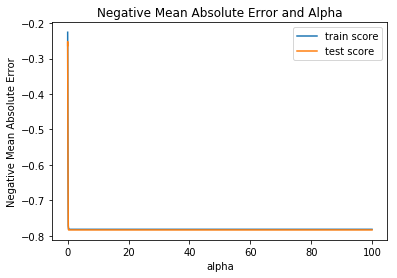

In [98]:
#Plotting mean test and train scores against alpha
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

#Plotting the lines
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [99]:
#Checking for the alpha value that gives the least mean_test_score

cv_results_lasso.sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.024002,0.005059,0.000000,0.000000,0.0010,{'alpha': 0.001},-0.248630,-0.266659,-0.260678,-0.234241,-0.250992,-0.252237,0.011110,1,-0.238815,-0.215039,-0.225691,-0.238352,-0.238425,-0.231264,0.009517
0,0.150411,0.036629,0.003200,0.003919,0.0001,{'alpha': 0.0001},-0.288132,-0.269585,-0.270551,-0.239030,-0.250493,-0.263582,0.017105,2,-0.231378,-0.210244,-0.220838,-0.233849,-0.233102,-0.225882,0.009119
2,0.020801,0.013949,0.003200,0.003919,0.0100,{'alpha': 0.01},-0.274210,-0.295039,-0.295758,-0.258105,-0.298320,-0.284276,0.015687,3,-0.280389,-0.266954,-0.272214,-0.283657,-0.283375,-0.277318,0.006630
3,0.019201,0.011974,0.003200,0.003920,0.0500,{'alpha': 0.05},-0.416271,-0.455560,-0.447411,-0.422862,-0.473090,-0.443012,0.020995,4,-0.439089,-0.435244,-0.434587,-0.442877,-0.445890,-0.439537,0.004351
4,0.022398,0.017819,0.008003,0.008764,0.1000,{'alpha': 0.1},-0.578110,-0.591676,-0.566403,-0.569640,-0.623166,-0.585791,0.020618,5,-0.588614,-0.583440,-0.590152,-0.581885,-0.580481,-0.584914,0.003798


In [100]:
#Fitting the lasso regression model with the optimal alpha value

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(h1_X_train, h1_y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [101]:
lasso.coef_

array([ 1.01959146e-01,  1.63627831e-01,  0.00000000e+00,  3.46933393e-01,
        4.89983984e-02, -3.62472461e-02,  3.71037778e-02,  0.00000000e+00,
       -2.18640155e-02, -2.65569987e-02,  1.42683446e-01,  1.17787312e-01,
        8.33317685e-02, -0.00000000e+00,  1.61942452e+00,  6.51495514e-01,
       -4.92567247e-02,  0.00000000e+00,  0.00000000e+00,  6.45804569e-02,
        2.76918995e-03,  0.00000000e+00,  7.85603398e-02, -0.00000000e+00,
        5.19426933e-02,  1.48779698e-01,  0.00000000e+00, -8.52228763e-02,
        7.58510274e-02, -1.50867041e-01, -0.00000000e+00,  0.00000000e+00,
        3.96234268e-02,  0.00000000e+00, -4.51865691e-02,  1.43518152e-01,
        1.57687840e-01,  1.71948906e-03,  5.23129572e-01,  0.00000000e+00,
        0.00000000e+00,  1.99283049e+00,  4.10849334e-01,  0.00000000e+00,
        3.53049567e-01,  1.19909847e-01,  1.05803341e-01,  0.00000000e+00,
        1.84632739e-01,  3.73315886e-01,  1.09872321e-01,  0.00000000e+00,
        2.45104098e-01,  

In [102]:
len(list(lasso.coef_))

82

### Preparing the test set to make predictions

In [103]:
#Frequency encoding

h1_test[variables_freq_enc] = count_encoder.transform(h1_test[variables_freq_enc])

In [104]:
#Rescaling the features

h1_test[variables_minmax] = scaler.transform(h1_test[variables_minmax])

In [105]:
#Transforming the target variable

h1_test['SalePrice'] = pt.transform(pd.DataFrame(h1_test['SalePrice']))

In [106]:
#Splitting the training data into h1_X_test and h1_y_test

h1_y_test = h1_test.pop('SalePrice')

In [107]:
h1_X_test = h1_test.copy()

In [108]:
h1_X_test.shape

(438, 82)

In [109]:
#Checking for null values as there could be unknown values that the feature encoder did not encounter during the fit

h1_X_test.columns[h1_X_test.isnull().any()]

Index(['Exterior2nd', 'BsmtFinSF1', 'Electrical', 'MiscFeature'], dtype='object')

In [110]:
#Replacing null values with zero

h1_X_test = h1_X_test.fillna(0)

In [111]:
#Re-checking for null values

h1_X_test.columns[h1_X_test.isnull().any()]

Index([], dtype='object')

### Predicting test scores using the Ridge model

In [112]:
#Using r2_score to check R-squared values

#Predicting the train r2 score
h1_y_train_pred_ridge = ridge.predict(h1_X_train)
r2_score(y_true = h1_y_train, y_pred = h1_y_train_pred_ridge)

0.8869280379008183

In [113]:
#Predicting the test r2 score

h1_y_test_pred_ridge = ridge.predict(h1_X_test)
r2_score(y_true = h1_y_test, y_pred = h1_y_test_pred_ridge)

0.8735538373592465

The test and train R-squared values are close.

### Predicting test scores using the Lasso model

In [114]:
#Predicting the train r2 score

h1_y_train_pred_lasso = lasso.predict(h1_X_train)
r2_score(y_true = h1_y_train, y_pred = h1_y_train_pred_lasso)

0.8839310639550381

In [115]:
#Predicting the test r2 score

h1_y_test_pred_lasso = lasso.predict(h1_X_test)
r2_score(y_true = h1_y_test, y_pred = h1_y_test_pred_lasso)

0.8753085854901804

The lasso model has very similar train and test scores when compared to the ridge model. However, since it uses fewer variables (by reducing the coefficients of variables to nearly zero), it is preferable to the ridge model.

### Answering the assignment questions

#### Question 1

##### Checking the most important predictor variables in the current model

In [116]:
#Creating a dataframe of the variable names and their coefficients in the ridge model

ridge_df = pd.DataFrame(data=zip(h1_X_train.columns, ridge.coef_), columns = ['Variables', 'Coefficients'])

In [117]:
ridge_df.sort_values('Coefficients', ascending=False)[0:5]

,Variables,Coefficients
14,OverallQual,1.481038
38,1stFlrSF,1.039142
41,GrLivArea,0.998237
15,OverallCond,0.717632
3,LotArea,0.547183


In [118]:
ridge_df.sort_values('Coefficients', ascending=True)[0:5]

,Variables,Coefficients
65,PoolQC,-0.555185
73,BuildingAge,-0.384883
64,PoolArea,-0.302851
78,LandSlope_1,-0.248954
29,BsmtFinSF1,-0.158613


The most important predictor variables in the ridge model are OverallQual, 1stFlrSF, GrLivArea, OverallCond, and LotArea. PoolQC is also important, but most of the values in this variable are equal to zero.

##### Using double the alpha value for ridge regression and checking its impact

In [119]:
alpha = 1.8
ridge_2 = Ridge(alpha=alpha)

ridge_2.fit(h1_X_train, h1_y_train)

Ridge(alpha=1.8, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [120]:
#Using r2_score to check R-squared values

#Predicting the train r2 score
h1_y_train_pred_ridge = ridge_2.predict(h1_X_train)
print(r2_score(y_true = h1_y_train, y_pred = h1_y_train_pred_ridge))

#Predicting the test r2 score
h1_y_test_pred_ridge = ridge_2.predict(h1_X_test)
print(r2_score(y_true = h1_y_test, y_pred = h1_y_test_pred_ridge))

0.8851427515184835
0.8732409767279583


In [121]:
#Creating a dataframe of the variable names and their coefficients in the ridge model

ridge_df_2 = pd.DataFrame(data=zip(h1_X_train.columns, ridge_2.coef_), columns = ['Variables', 'Coefficients'])

In [122]:
ridge_df_2.sort_values('Coefficients', ascending=False)[0:6]

,Variables,Coefficients
14,OverallQual,1.366689
38,1stFlrSF,0.871710
41,GrLivArea,0.856661
15,OverallCond,0.654682
55,GarageCars,0.487331
49,TotRmsAbvGrd,0.469428


In [123]:
ridge_df_2.sort_values('Coefficients', ascending=True)[0:5]

,Variables,Coefficients
65,PoolQC,-0.404309
73,BuildingAge,-0.322720
64,PoolArea,-0.285389
78,LandSlope_1,-0.230127
74,RemodAge,-0.169572


The most important predictor variables in the ridge model with double the optimal alpha value are OverallQual, 1stFlrSF, GrLivArea, OverallCond, GarageCars, and TotRmsAbvGrd.
Also, the R-squared values have gone down marginally from 88.6928 to 88.5143 (train set) and 87.3554 to 87.3241 (test set).

##### Creating a dataframe of the variable names and their coefficients in the lasso model

In [124]:
lasso_df = pd.DataFrame(data=zip(h1_X_train.columns, lasso.coef_), columns = ['Variables', 'Coefficients'])

In [125]:
lasso_df.sort_values('Coefficients', ascending=False)[0:5]

,Variables,Coefficients
41,GrLivArea,1.992830
14,OverallQual,1.619425
15,OverallCond,0.651496
55,GarageCars,0.555769
38,1stFlrSF,0.523130


In [126]:
lasso_df.sort_values('Coefficients', ascending=True)[0:5]

,Variables,Coefficients
65,PoolQC,-0.640266
73,BuildingAge,-0.325416
74,RemodAge,-0.160489
78,LandSlope_1,-0.151100
29,BsmtFinSF1,-0.150867


The most important predictor variables in the lasso model are GrLivArea, OverallQual, OverallCond, GarageCars, and 1stFlrSF. PoolQC is also important, but most of the values in this variable are equal to zero.

##### Using double the alpha value for lasso regression and checking its impact

In [127]:
alpha = 0.002
lasso_2 = Lasso(alpha=alpha)

lasso_2.fit(h1_X_train, h1_y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [128]:
#Using r2_score to check R-squared values

#Predicting the train r2 score
h1_y_train_pred_lasso = lasso_2.predict(h1_X_train)
print(r2_score(y_true = h1_y_train, y_pred = h1_y_train_pred_lasso))

#Predicting the test r2 score
h1_y_test_pred_lasso = lasso_2.predict(h1_X_test)
print(r2_score(y_true = h1_y_test, y_pred = h1_y_test_pred_lasso))

0.8783007205229273
0.8725649966086284


In [129]:
#Creating a dataframe of the variable names and their coefficients in the lasso model

lasso_df_2 = pd.DataFrame(data=zip(h1_X_train.columns, lasso_2.coef_), columns = ['Variables', 'Coefficients'])

In [130]:
lasso_df_2.sort_values('Coefficients', ascending=False)[0:6]

,Variables,Coefficients
41,GrLivArea,1.838181
14,OverallQual,1.644072
55,GarageCars,0.583842
15,OverallCond,0.554924
49,TotRmsAbvGrd,0.463714
42,BsmtFullBath,0.380725


In [131]:
lasso_df_2.sort_values('Coefficients', ascending=True)[0:6]

,Variables,Coefficients
73,BuildingAge,-0.285027
74,RemodAge,-0.178756
29,BsmtFinSF1,-0.153977
65,PoolQC,-0.132116
78,LandSlope_1,-0.132080
27,BsmtExposure,-0.087992


The most important predictor variables in the lasso model with double the optimal alpha value are GrLivArea, OverallQual, GarageCars, OverallCond, TotRmsAbvGrd, and BsmtFullBath. Also, the R-squared values have gone down marginally from 88.3931 to 87.8301 (train set) and 87.5309 to 87.2565 (test set).

#### Question 2

In [132]:
ridge_df.shape

(82, 2)

In [133]:
#Checking the number of variables that have an absolute coefficient value of 0.01 or higher in the ridge regression model

ridge_df[abs(ridge_df['Coefficients']) >=.01].shape

(78, 2)

In [134]:
lasso_df.shape

(82, 2)

In [135]:
#Checking the number of variables that have an absolute coefficient value of 0.01 or higher in the lasso regression model

lasso_df[abs(lasso_df['Coefficients']) >=.01].shape

(55, 2)

Lasso regression reduces the number of variables from 82 to 55 (if 0.01 is set as the minimum coefficient value).

#### Question 3

In [136]:
#Creating a list of the top 5 most important predictor variables in the lasso regression model

top5_list = list(lasso_df.sort_values('Coefficients', ascending=False)['Variables'][0:5])

In [137]:
top5_list

['GrLivArea', 'OverallQual', 'OverallCond', 'GarageCars', '1stFlrSF']

In [138]:
len(list(h1_X_train.columns))

82

In [139]:
#Removing the top 5 predictor variables from the list of variables in the model

lasso_cols = list(set(h1_X_train.columns)-set(top5_list))

In [140]:
len(lasso_cols)

77

In [141]:
#Fitting a lasso regression model without the top 5 predictor variables

alpha = 0.001

lasso_3 = Lasso(alpha=alpha)
        
lasso_3.fit(h1_X_train[lasso_cols], h1_y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [142]:
#Creating a dataframe of the variable names and their coefficients in the lasso model

lasso_df_3 = pd.DataFrame(data=zip(h1_X_train[lasso_cols].columns, lasso_3.coef_), columns = ['Variables', 'Coefficients'])

In [143]:
lasso_df_3.sort_values('Coefficients', ascending=False)[0:5]

,Variables,Coefficients
18,TotalBsmtSF,1.657935
2,TotRmsAbvGrd,1.007304
1,GarageArea,0.896747
71,FullBath,0.624901
29,2ndFlrSF,0.516469


In [144]:
lasso_df_3.sort_values('Coefficients', ascending=True)[0:5]

,Variables,Coefficients
66,PoolQC,-0.547198
6,RemodAge,-0.332528
16,BsmtFinSF1,-0.172128
37,RoofStyle,-0.138611
40,BsmtExposure,-0.135886


In [145]:
#Using r2_score to check R-squared values

#Predicting the train r2 score
h1_y_train_pred_lasso = lasso_3.predict(h1_X_train[lasso_cols])
print(r2_score(y_true = h1_y_train, y_pred = h1_y_train_pred_lasso))

#Predicting the test r2 score
h1_y_test_pred_lasso = lasso_3.predict(h1_X_test[lasso_cols])
print(r2_score(y_true = h1_y_test, y_pred = h1_y_test_pred_lasso))

0.8499205253507667
0.836853618288857


#### Question 4

In [146]:
#Checking the number of variables that have an absolute coefficient value of 0.1 or higher in the lasso regression model

lasso_df_4 = lasso_df[abs(lasso_df['Coefficients']) >= 0.1]

In [147]:
few_cols = list(lasso_df_4['Variables'])

In [148]:
#Creating a dataframe that contains only the variables that had an absolute coefficient value of 0.1 or higher

lasso_X_train = h1_X_train[few_cols]
lasso_X_test = h1_X_test[few_cols]

In [149]:
print(lasso_X_train.shape)
print(lasso_X_test.shape)

(1021, 32)
(438, 32)


In [150]:
##Performing grid search to tune the alpha value for the new model with 32 variables

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs = -1)            

model_cv_lasso.fit(lasso_X_train, h1_y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [151]:
#Creating a dataframe that contains the results of the cross-validation

cv_results_lasso_few = pd.DataFrame(model_cv_lasso.cv_results_)

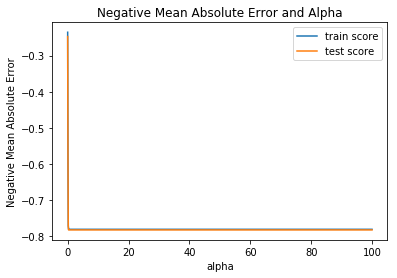

In [152]:
#Plotting mean test and train scores against alpha 
cv_results_lasso_few['param_alpha'] = cv_results_lasso_few['param_alpha'].astype('float32')

#Plotting the lines
plt.plot(cv_results_lasso_few['param_alpha'], cv_results_lasso_few['mean_train_score'])
plt.plot(cv_results_lasso_few['param_alpha'], cv_results_lasso_few['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [153]:
#Checking for the alpha value that gives the least mean_test_score

cv_results_lasso_few.sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028801,0.009602,0.025602,0.028355,0.0001,{'alpha': 0.0001},-0.238124,-0.261986,-0.261735,-0.234438,-0.239079,-0.247063,0.012171,1,-0.241503,-0.224098,-0.227852,-0.240939,-0.241304,-0.235139,0.007579
1,0.032001,0.015998,0.006401,0.003200,0.0010,{'alpha': 0.001},-0.241308,-0.261678,-0.262503,-0.234662,-0.248392,-0.249700,0.011004,2,-0.244355,-0.225444,-0.231218,-0.244308,-0.245229,-0.238111,0.008198
2,0.016001,0.000002,0.004800,0.003919,0.0100,{'alpha': 0.01},-0.276003,-0.298394,-0.297613,-0.262054,-0.301329,-0.287068,0.015430,3,-0.283677,-0.269847,-0.275460,-0.286832,-0.287071,-0.280577,0.006815
3,0.022402,0.009331,0.004801,0.003920,0.0500,{'alpha': 0.05},-0.416270,-0.455461,-0.447409,-0.422862,-0.473090,-0.442992,0.020983,4,-0.439088,-0.435780,-0.434585,-0.442877,-0.445891,-0.439644,0.004250
4,0.025604,0.011757,0.008001,0.005060,0.1000,{'alpha': 0.1},-0.578110,-0.591676,-0.566403,-0.569640,-0.623166,-0.585791,0.020618,5,-0.588614,-0.583440,-0.590152,-0.581885,-0.580481,-0.584914,0.003798


In [154]:
#Fitting the lasso regression model with the optimal alpha value

alpha = 0.0001

lasso_few = Lasso(alpha=alpha)
        
lasso_few.fit(lasso_X_train, h1_y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [155]:
#Using r2_score to check R-squared values

#Predicting the train r2 score
h1_y_train_pred_lasso = lasso_few.predict(lasso_X_train)
print(r2_score(y_true = h1_y_train, y_pred = h1_y_train_pred_lasso))

#Predicting the test r2 score
h1_y_test_pred_lasso = lasso_few.predict(lasso_X_test)
print(r2_score(y_true = h1_y_test, y_pred = h1_y_test_pred_lasso))

0.8806702506988406
0.8700261307196192


In [156]:
lasso_few_df = pd.DataFrame(data=zip(lasso_X_train.columns, lasso_few.coef_), columns = ['Variables', 'Coefficients'])

In [157]:
lasso_few_df.sort_values('Coefficients', ascending=False)[0:5]

,Variables,Coefficients
12,GrLivArea,2.386022
5,OverallQual,1.685659
2,LotArea,0.849820
6,OverallCond,0.733876
11,1stFlrSF,0.570297


In [158]:
lasso_few_df.sort_values('Coefficients', ascending=True)[0:5]

,Variables,Coefficients
26,PoolQC,-1.220195
27,BuildingAge,-0.503398
28,RemodAge,-0.173336
30,LandSlope_1,-0.124419
8,BsmtFinSF1,-0.109758


The most important predictor variables in this model are: GrLivArea, OverallQual, PoolQC, LotArea, OverallCond, and 1stFlrSF.

In [159]:
#Defining a function to calculate the VIF

def vif_func(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [160]:
#Checking the vif values

vif_func(lasso_X_train)

,Features,VIF
4,Condition2,62.64
5,OverallQual,49.33
12,GrLivArea,42.07
7,BsmtQual,39.62
22,GarageCars,37.83
23,GarageArea,33.77
16,BedroomAbvGr,32.49
6,OverallCond,30.97
18,TotRmsAbvGrd,27.49
14,FullBath,22.73


With 32 variables, the drop in the lasso regression model's performance is minimal. However, as we can see from the vif values, there is a high degree of multicollinearity among the variables. The model can still be used to make predictions, but we cannot make any assumptions about the variables.

#### Checking VIF and p-values and eliminating variables to reduce multicollinearity

In [161]:
#Creating a copy of the predictor variables for linear regression and vif

lasso_X_train_lr = lasso_X_train.copy()
lasso_X_train_vif = lasso_X_train.copy()

In [162]:
#Adding a constant column as statsmodel fits a line through the origin by default

lasso_X_train_lr = sm.add_constant(lasso_X_train_lr)

In [163]:
lr_1 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     227.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:11   Log-Likelihood:                -363.41
No. Observations:                1021   AIC:                             792.8
Df Residuals:                     988   BIC:                             955.5
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.8083      0.184    -20.656      0.000      -4.170      -3.447
MSSubClass       0.1234      0.037      3.344      0.001       0.051       0.196
MSZoning         0.1893      0.038      4.985      0.000       0.115       0.264
LotArea          0.8948      0.262      3.418      0.001       0.381       1.409
Condition1       0.1379      0.035      3.923      0.000       0.069       0.207
Condition2       0.2251      0.105      2.135      0.033       0.018       0.432
OverallQual      1.6836      0.132     12.721      0.000       1.424       1.943
OverallCond      0.7430      0.105      7.045      0.000       0.536       0.950
BsmtQual         0.2610      0.086      3.035      0.002       0.092       0.430
BsmtFinSF1      -0.1090      0.030     -3.636      0.000      -0.168      -0.050
HeatingQC        0.1885      0.059      3.193      0.001       0.073       0.304
CentralAir       0.1193      0.052      2.307      0.021       0.018       0.221
1stFlrSF         0.5845      0.217      2.698      0.007       0.159       1.010
GrLivArea        2.4041      0.311      7.738      0.000       1.794       3.014
BsmtFullBath     0.4412      0.078      5.621      0.000       0.287       0.595
FullBath         0.2821      0.099      2.846      0.005       0.088       0.477
HalfBath         0.0804      0.064      1.251      0.211      -0.046       0.207
BedroomAbvGr     0.1917      0.170      1.129      0.259      -0.142       0.525
KitchenQual      0.2138      0.078      2.741      0.006       0.061       0.367
TotRmsAbvGrd     0.2044      0.165      1.237      0.216      -0.120       0.529
Functional       0.1409      0.049      2.882      0.004       0.045       0.237
FireplaceQu      0.2364      0.039      6.073      0.000       0.160       0.313
GarageType       0.1168      0.038      3.067      0.002       0.042       0.192
GarageCars       0.5488      0.141      3.887      0.000       0.272       0.826
GarageArea       0.1792      0.175      1.024      0.306      -0.164       0.523
WoodDeckSF       0.1859      0.084      2.213      0.027       0.021       0.351
ScreenPorch      0.1744      0.084      2.077      0.038       0.010       0.339
PoolQC          -1.2722      0.233     -5.461      0.000      -1.729      -0.815
BuildingAge     -0.5087      0.102     -5.011      0.000      -0.708      -0.310
RemodAge        -0.1719      0.053     -3.273      0.001      -0.275      -0.069
Alley_Pave       0.1954      0.080      2.427      0.015       0.037       0.353
LandSlope_1     -0.1231      0.052     -2.356      0.019      -0.226      -0.021
PavedDrive_P     0.1603      0.080      1.999      0.046       0.003       0.318
==============================================================================
Omnibus:                      559.673   Durbin-Watson:                   2.036
Prob(Omni

In [164]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
4,Condition2,62.64
5,OverallQual,49.33
12,GrLivArea,42.07
7,BsmtQual,39.62
22,GarageCars,37.83
23,GarageArea,33.77
16,BedroomAbvGr,32.49
6,OverallCond,30.97
18,TotRmsAbvGrd,27.49
14,FullBath,22.73


In [165]:
#Dropping the GarageArea variable as it has the highest p-value and a high VIF

lasso_X_train_vif = lasso_X_train_vif.drop(['GarageArea'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['GarageArea'], axis=1)

In [166]:
lr_2 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     235.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:12   Log-Likelihood:                -363.95
No. Observations:                1021   AIC:                             791.9
Df Residuals:                     989   BIC:                             949.6
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.8105      0.184    -20.669      0.000      -4.172      -3.449
MSSubClass       0.1269      0.037      3.454      0.001       0.055       0.199
MSZoning         0.1878      0.038      4.948      0.000       0.113       0.262
LotArea          0.9080      0.262      3.472      0.001       0.395       1.421
Condition1       0.1369      0.035      3.896      0.000       0.068       0.206
Condition2       0.2222      0.105      2.109      0.035       0.015       0.429
OverallQual      1.6874      0.132     12.754      0.000       1.428       1.947
OverallCond      0.7491      0.105      7.114      0.000       0.542       0.956
BsmtQual         0.2589      0.086      3.011      0.003       0.090       0.428
BsmtFinSF1      -0.1091      0.030     -3.639      0.000      -0.168      -0.050
HeatingQC        0.1899      0.059      3.217      0.001       0.074       0.306
CentralAir       0.1212      0.052      2.346      0.019       0.020       0.223
1stFlrSF         0.6057      0.216      2.809      0.005       0.183       1.029
GrLivArea        2.4370      0.309      7.886      0.000       1.831       3.043
BsmtFullBath     0.4454      0.078      5.683      0.000       0.292       0.599
FullBath         0.2755      0.099      2.785      0.005       0.081       0.470
HalfBath         0.0769      0.064      1.198      0.231      -0.049       0.203
BedroomAbvGr     0.1865      0.170      1.099      0.272      -0.147       0.520
KitchenQual      0.2177      0.078      2.794      0.005       0.065       0.371
TotRmsAbvGrd     0.1991      0.165      1.205      0.229      -0.125       0.523
Functional       0.1406      0.049      2.876      0.004       0.045       0.237
FireplaceQu      0.2328      0.039      6.004      0.000       0.157       0.309
GarageType       0.1163      0.038      3.052      0.002       0.041       0.191
GarageCars       0.6672      0.081      8.234      0.000       0.508       0.826
WoodDeckSF       0.1869      0.084      2.224      0.026       0.022       0.352
ScreenPorch      0.1765      0.084      2.102      0.036       0.012       0.341
PoolQC          -1.2492      0.232     -5.388      0.000      -1.704      -0.794
BuildingAge     -0.5109      0.101     -5.034      0.000      -0.710      -0.312
RemodAge        -0.1696      0.052     -3.232      0.001      -0.273      -0.067
Alley_Pave       0.1933      0.080      2.402      0.017       0.035       0.351
LandSlope_1     -0.1220      0.052     -2.336      0.020      -0.225      -0.019
PavedDrive_P     0.1644      0.080      2.053      0.040       0.007       0.322
==============================================================================
Omnibus:                      550.249   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12581.042
Skew:      

In [167]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
4,Condition2,62.54
5,OverallQual,49.30
12,GrLivArea,41.60
7,BsmtQual,39.58
16,BedroomAbvGr,32.46
6,OverallCond,30.88
18,TotRmsAbvGrd,27.47
14,FullBath,22.61
10,CentralAir,20.02
29,LandSlope_1,19.96


In [168]:
#Dropping the BedroomAbvGr variable as it has the highest p-value and a high VIF

lasso_X_train_vif = lasso_X_train_vif.drop(['BedroomAbvGr'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['BedroomAbvGr'], axis=1)

In [169]:
lr_3 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     243.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:13   Log-Likelihood:                -364.58
No. Observations:                1021   AIC:                             791.2
Df Residuals:                     990   BIC:                             943.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.7872      0.183    -20.678      0.000      -4.147      -3.428
MSSubClass       0.1346      0.036      3.732      0.000       0.064       0.205
MSZoning         0.1910      0.038      5.047      0.000       0.117       0.265
LotArea          0.8986      0.261      3.438      0.001       0.386       1.412
Condition1       0.1353      0.035      3.853      0.000       0.066       0.204
Condition2       0.2319      0.105      2.208      0.027       0.026       0.438
OverallQual      1.6721      0.132     12.708      0.000       1.414       1.930
OverallCond      0.7547      0.105      7.175      0.000       0.548       0.961
BsmtQual         0.2630      0.086      3.062      0.002       0.094       0.432
BsmtFinSF1      -0.1093      0.030     -3.646      0.000      -0.168      -0.050
HeatingQC        0.1862      0.059      3.159      0.002       0.071       0.302
CentralAir       0.1249      0.052      2.423      0.016       0.024       0.226
1stFlrSF         0.5651      0.212      2.660      0.008       0.148       0.982
GrLivArea        2.4750      0.307      8.059      0.000       1.872       3.078
BsmtFullBath     0.4414      0.078      5.636      0.000       0.288       0.595
FullBath         0.2885      0.098      2.938      0.003       0.096       0.481
HalfBath         0.0737      0.064      1.150      0.250      -0.052       0.200
KitchenQual      0.2075      0.077      2.681      0.007       0.056       0.359
TotRmsAbvGrd     0.2905      0.143      2.036      0.042       0.010       0.571
Functional       0.1435      0.049      2.939      0.003       0.048       0.239
FireplaceQu      0.2286      0.039      5.924      0.000       0.153       0.304
GarageType       0.1168      0.038      3.065      0.002       0.042       0.192
GarageCars       0.6611      0.081      8.177      0.000       0.502       0.820
WoodDeckSF       0.1826      0.084      2.176      0.030       0.018       0.347
ScreenPorch      0.1734      0.084      2.067      0.039       0.009       0.338
PoolQC          -1.2482      0.232     -5.383      0.000      -1.703      -0.793
BuildingAge     -0.5113      0.102     -5.037      0.000      -0.711      -0.312
RemodAge        -0.1653      0.052     -3.159      0.002      -0.268      -0.063
Alley_Pave       0.1999      0.080      2.491      0.013       0.042       0.357
LandSlope_1     -0.1217      0.052     -2.329      0.020      -0.224      -0.019
PavedDrive_P     0.1649      0.080      2.059      0.040       0.008       0.322
==============================================================================
Omnibus:                      556.251   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13071.832
Skew:                          -1.999   Prob(JB):                         0.00
Kurtosis:    

In [170]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
4,Condition2,60.53
5,OverallQual,48.86
12,GrLivArea,41.19
7,BsmtQual,39.27
6,OverallCond,30.73
14,FullBath,22.01
17,TotRmsAbvGrd,20.64
28,LandSlope_1,19.93
10,CentralAir,19.88
9,HeatingQC,18.96


In [171]:
#Dropping the HalfBath variable as it has the highest p-value

lasso_X_train_vif = lasso_X_train_vif.drop(['HalfBath'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['HalfBath'], axis=1)

In [172]:
lr_4 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     251.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:13   Log-Likelihood:                -365.26
No. Observations:                1021   AIC:                             790.5
Df Residuals:                     991   BIC:                             938.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.7568      0.181    -20.726      0.000      -4.112      -3.401
MSSubClass       0.1331      0.036      3.692      0.000       0.062       0.204
MSZoning         0.1948      0.038      5.169      0.000       0.121       0.269
LotArea          0.8954      0.261      3.425      0.001       0.382       1.408
Condition1       0.1353      0.035      3.851      0.000       0.066       0.204
Condition2       0.2326      0.105      2.215      0.027       0.027       0.439
OverallQual      1.6661      0.131     12.670      0.000       1.408       1.924
OverallCond      0.7516      0.105      7.146      0.000       0.545       0.958
BsmtQual         0.2671      0.086      3.112      0.002       0.099       0.436
BsmtFinSF1      -0.1092      0.030     -3.639      0.000      -0.168      -0.050
HeatingQC        0.1810      0.059      3.080      0.002       0.066       0.296
CentralAir       0.1270      0.052      2.463      0.014       0.026       0.228
1stFlrSF         0.4394      0.182      2.412      0.016       0.082       0.797
GrLivArea        2.6575      0.263     10.104      0.000       2.141       3.174
BsmtFullBath     0.4399      0.078      5.617      0.000       0.286       0.594
FullBath         0.2461      0.091      2.703      0.007       0.067       0.425
KitchenQual      0.2049      0.077      2.649      0.008       0.053       0.357
TotRmsAbvGrd     0.2879      0.143      2.017      0.044       0.008       0.568
Functional       0.1452      0.049      2.974      0.003       0.049       0.241
FireplaceQu      0.2297      0.039      5.954      0.000       0.154       0.305
GarageType       0.1189      0.038      3.125      0.002       0.044       0.194
GarageCars       0.6629      0.081      8.200      0.000       0.504       0.822
WoodDeckSF       0.1837      0.084      2.188      0.029       0.019       0.348
ScreenPorch      0.1806      0.084      2.158      0.031       0.016       0.345
PoolQC          -1.2763      0.231     -5.534      0.000      -1.729      -0.824
BuildingAge     -0.5436      0.098     -5.571      0.000      -0.735      -0.352
RemodAge        -0.1674      0.052     -3.200      0.001      -0.270      -0.065
Alley_Pave       0.2029      0.080      2.529      0.012       0.045       0.360
LandSlope_1     -0.1227      0.052     -2.348      0.019      -0.225      -0.020
PavedDrive_P     0.1628      0.080      2.033      0.042       0.006       0.320
==============================================================================
Omnibus:                      555.961   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13061.457
Skew:                          -1.997   Prob(JB):                         0.00
Kurtosis:                      20.061   Cond. No.                         89.9
===============

In [173]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
4,Condition2,59.81
5,OverallQual,48.83
7,BsmtQual,38.89
6,OverallCond,30.73
12,GrLivArea,30.53
16,TotRmsAbvGrd,20.63
27,LandSlope_1,19.93
10,CentralAir,19.81
14,FullBath,19.29
9,HeatingQC,18.90


In [174]:
#Dropping the Condition2 variable as it has the highest vif value

lasso_X_train_vif = lasso_X_train_vif.drop(['Condition2'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['Condition2'], axis=1)

In [175]:
lr_5 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     259.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:14   Log-Likelihood:                -367.78
No. Observations:                1021   AIC:                             793.6
Df Residuals:                     992   BIC:                             936.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.5239      0.148    -23.818      0.000      -3.814      -3.234
MSSubClass       0.1357      0.036      3.760      0.000       0.065       0.207
MSZoning         0.1958      0.038      5.183      0.000       0.122       0.270
LotArea          0.8914      0.262      3.403      0.001       0.377       1.405
Condition1       0.1552      0.034      4.560      0.000       0.088       0.222
OverallQual      1.6612      0.132     12.610      0.000       1.403       1.920
OverallCond      0.7568      0.105      7.184      0.000       0.550       0.964
BsmtQual         0.2599      0.086      3.024      0.003       0.091       0.428
BsmtFinSF1      -0.1115      0.030     -3.713      0.000      -0.170      -0.053
HeatingQC        0.1848      0.059      3.139      0.002       0.069       0.300
CentralAir       0.1232      0.052      2.387      0.017       0.022       0.225
1stFlrSF         0.4205      0.182      2.306      0.021       0.063       0.778
GrLivArea        2.6248      0.263      9.976      0.000       2.109       3.141
BsmtFullBath     0.4398      0.078      5.605      0.000       0.286       0.594
FullBath         0.2363      0.091      2.594      0.010       0.058       0.415
KitchenQual      0.2067      0.077      2.668      0.008       0.055       0.359
TotRmsAbvGrd     0.3115      0.143      2.184      0.029       0.032       0.591
Functional       0.1380      0.049      2.828      0.005       0.042       0.234
FireplaceQu      0.2367      0.039      6.145      0.000       0.161       0.312
GarageType       0.1233      0.038      3.237      0.001       0.049       0.198
GarageCars       0.6563      0.081      8.108      0.000       0.497       0.815
WoodDeckSF       0.1810      0.084      2.152      0.032       0.016       0.346
ScreenPorch      0.1824      0.084      2.176      0.030       0.018       0.347
PoolQC          -1.2425      0.231     -5.389      0.000      -1.695      -0.790
BuildingAge     -0.5680      0.097     -5.847      0.000      -0.759      -0.377
RemodAge        -0.1604      0.052     -3.066      0.002      -0.263      -0.058
Alley_Pave       0.2107      0.080      2.624      0.009       0.053       0.368
LandSlope_1     -0.1231      0.052     -2.352      0.019      -0.226      -0.020
PavedDrive_P     0.1580      0.080      1.971      0.049       0.001       0.315
==============================================================================
Omnibus:                      580.115   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14810.523
Skew:                          -2.095   Prob(JB):                         0.00
Kurtosis:                      21.182   Cond. No.                         85.5
==============================================================================

Warnings:
[1] St

In [176]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
4,OverallQual,48.73
6,BsmtQual,36.98
11,GrLivArea,30.21
5,OverallCond,29.98
15,TotRmsAbvGrd,20.55
9,CentralAir,19.68
26,LandSlope_1,19.24
13,FullBath,18.85
8,HeatingQC,18.46
16,Functional,17.65


In [177]:
#Dropping the OverallQual variable as it has the highest vif value

lasso_X_train_vif = lasso_X_train_vif.drop(['OverallQual'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['OverallQual'], axis=1)

In [178]:
lr_6 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     226.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:14   Log-Likelihood:                -443.68
No. Observations:                1021   AIC:                             943.4
Df Residuals:                     993   BIC:                             1081.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.3351      0.158    -21.045      0.000      -3.646      -3.024
MSSubClass       0.1049      0.039      2.704      0.007       0.029       0.181
MSZoning         0.1607      0.041      3.963      0.000       0.081       0.240
LotArea          0.8186      0.282      2.904      0.004       0.265       1.372
Condition1       0.1811      0.037      4.952      0.000       0.109       0.253
OverallCond      0.8840      0.113      7.830      0.000       0.662       1.106
BsmtQual         0.5461      0.089      6.120      0.000       0.371       0.721
BsmtFinSF1      -0.0805      0.032     -2.498      0.013      -0.144      -0.017
HeatingQC        0.1935      0.063      3.054      0.002       0.069       0.318
CentralAir       0.1050      0.056      1.889      0.059      -0.004       0.214
1stFlrSF         0.6006      0.196      3.068      0.002       0.216       0.985
GrLivArea        3.4165      0.275     12.419      0.000       2.877       3.956
BsmtFullBath     0.4055      0.084      4.803      0.000       0.240       0.571
FullBath         0.2872      0.098      2.931      0.003       0.095       0.480
KitchenQual      0.4580      0.081      5.680      0.000       0.300       0.616
TotRmsAbvGrd     0.1846      0.153      1.205      0.228      -0.116       0.485
Functional       0.2228      0.052      4.281      0.000       0.121       0.325
FireplaceQu      0.3402      0.041      8.393      0.000       0.261       0.420
GarageType       0.1680      0.041      4.114      0.000       0.088       0.248
GarageCars       0.7727      0.087      8.925      0.000       0.603       0.943
WoodDeckSF       0.1616      0.091      1.785      0.075      -0.016       0.339
ScreenPorch      0.1986      0.090      2.201      0.028       0.022       0.376
PoolQC          -1.2663      0.248     -5.101      0.000      -1.753      -0.779
BuildingAge     -0.8374      0.102     -8.208      0.000      -1.038      -0.637
RemodAge        -0.1770      0.056     -3.143      0.002      -0.287      -0.066
Alley_Pave       0.2544      0.086      2.945      0.003       0.085       0.424
LandSlope_1     -0.0832      0.056     -1.478      0.140      -0.194       0.027
PavedDrive_P     0.1497      0.086      1.734      0.083      -0.020       0.319
==============================================================================
Omnibus:                      533.587   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11698.849
Skew:                          -1.905   Prob(JB):                         0.00
Kurtosis:                      19.139   Cond. No.                         82.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specif

In [179]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
5,BsmtQual,32.77
4,OverallCond,29.52
10,GrLivArea,28.60
14,TotRmsAbvGrd,20.45
8,CentralAir,19.68
25,LandSlope_1,19.05
12,FullBath,18.72
7,HeatingQC,18.44
15,Functional,17.19
13,KitchenQual,13.83


In [180]:
#Dropping the TotRmsAbvGrd variable as it has the highest p-value

lasso_X_train_vif = lasso_X_train_vif.drop(['TotRmsAbvGrd'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['TotRmsAbvGrd'], axis=1)

In [181]:
lr_7 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     235.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:15   Log-Likelihood:                -444.42
No. Observations:                1021   AIC:                             942.8
Df Residuals:                     994   BIC:                             1076.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.3366      0.159    -21.051      0.000      -3.648      -3.026
MSSubClass       0.1070      0.039      2.762      0.006       0.031       0.183
MSZoning         0.1658      0.040      4.109      0.000       0.087       0.245
LotArea          0.8165      0.282      2.896      0.004       0.263       1.370
Condition1       0.1801      0.037      4.925      0.000       0.108       0.252
OverallCond      0.8818      0.113      7.809      0.000       0.660       1.103
BsmtQual         0.5425      0.089      6.081      0.000       0.367       0.718
BsmtFinSF1      -0.0782      0.032     -2.429      0.015      -0.141      -0.015
HeatingQC        0.1912      0.063      3.018      0.003       0.067       0.316
CentralAir       0.1063      0.056      1.914      0.056      -0.003       0.215
1stFlrSF         0.5811      0.195      2.978      0.003       0.198       0.964
GrLivArea        3.6438      0.200     18.187      0.000       3.251       4.037
BsmtFullBath     0.4029      0.084      4.773      0.000       0.237       0.569
FullBath         0.3037      0.097      3.129      0.002       0.113       0.494
KitchenQual      0.4541      0.081      5.635      0.000       0.296       0.612
Functional       0.2252      0.052      4.331      0.000       0.123       0.327
FireplaceQu      0.3385      0.041      8.355      0.000       0.259       0.418
GarageType       0.1636      0.041      4.023      0.000       0.084       0.243
GarageCars       0.7754      0.087      8.956      0.000       0.605       0.945
WoodDeckSF       0.1573      0.090      1.739      0.082      -0.020       0.335
ScreenPorch      0.1981      0.090      2.194      0.028       0.021       0.375
PoolQC          -1.3298      0.243     -5.481      0.000      -1.806      -0.854
BuildingAge     -0.8234      0.101     -8.122      0.000      -1.022      -0.624
RemodAge        -0.1774      0.056     -3.150      0.002      -0.288      -0.067
Alley_Pave       0.2391      0.085      2.798      0.005       0.071       0.407
LandSlope_1     -0.0746      0.056     -1.337      0.182      -0.184       0.035
PavedDrive_P     0.1473      0.086      1.707      0.088      -0.022       0.317
==============================================================================
Omnibus:                      545.787   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12467.104
Skew:                          -1.954   Prob(JB):                         0.00
Kurtosis:                      19.667   Cond. No.                         71.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
5,BsmtQual,32.72
4,OverallCond,29.51
8,CentralAir,19.67
24,LandSlope_1,18.73
7,HeatingQC,18.42
12,FullBath,18.33
14,Functional,17.16
10,GrLivArea,15.06
13,KitchenQual,13.81
17,GarageCars,12.05


In [183]:
#Dropping the LandSlope_1 variable as it has the highest p-value

lasso_X_train_vif = lasso_X_train_vif.drop(['LandSlope_1'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['LandSlope_1'], axis=1)

In [184]:
lr_8 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     244.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:15   Log-Likelihood:                -445.34
No. Observations:                1021   AIC:                             942.7
Df Residuals:                     995   BIC:                             1071.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.4053      0.150    -22.702      0.000      -3.700      -3.111
MSSubClass       0.1060      0.039      2.735      0.006       0.030       0.182
MSZoning         0.1647      0.040      4.082      0.000       0.086       0.244
LotArea          0.9193      0.271      3.387      0.001       0.387       1.452
Condition1       0.1817      0.037      4.971      0.000       0.110       0.253
OverallCond      0.8771      0.113      7.769      0.000       0.656       1.099
BsmtQual         0.5465      0.089      6.128      0.000       0.372       0.722
BsmtFinSF1      -0.0801      0.032     -2.492      0.013      -0.143      -0.017
HeatingQC        0.1895      0.063      2.991      0.003       0.065       0.314
CentralAir       0.1086      0.056      1.955      0.051      -0.000       0.218
1stFlrSF         0.5833      0.195      2.989      0.003       0.200       0.966
GrLivArea        3.6351      0.200     18.146      0.000       3.242       4.028
BsmtFullBath     0.4065      0.084      4.816      0.000       0.241       0.572
FullBath         0.3019      0.097      3.109      0.002       0.111       0.492
KitchenQual      0.4510      0.081      5.596      0.000       0.293       0.609
Functional       0.2202      0.052      4.243      0.000       0.118       0.322
FireplaceQu      0.3388      0.041      8.359      0.000       0.259       0.418
GarageType       0.1594      0.041      3.929      0.000       0.080       0.239
GarageCars       0.7783      0.087      8.989      0.000       0.608       0.948
WoodDeckSF       0.1678      0.090      1.861      0.063      -0.009       0.345
ScreenPorch      0.2017      0.090      2.234      0.026       0.025       0.379
PoolQC          -1.3419      0.243     -5.532      0.000      -1.818      -0.866
BuildingAge     -0.8181      0.101     -8.072      0.000      -1.017      -0.619
RemodAge        -0.1775      0.056     -3.150      0.002      -0.288      -0.067
Alley_Pave       0.2380      0.085      2.784      0.005       0.070       0.406
PavedDrive_P     0.1490      0.086      1.725      0.085      -0.020       0.318
==============================================================================
Omnibus:                      546.726   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12767.434
Skew:                          -1.952   Prob(JB):                         0.00
Kurtosis:                      19.878   Cond. No.                         65.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
5,BsmtQual,32.11
4,OverallCond,29.08
8,CentralAir,19.65
7,HeatingQC,18.24
12,FullBath,18.01
14,Functional,16.76
10,GrLivArea,15.06
13,KitchenQual,13.75
17,GarageCars,12.05
9,1stFlrSF,11.41


In [186]:
#Dropping the PavedDrive_P variable as it has the highest p-value

lasso_X_train_vif = lasso_X_train_vif.drop(['PavedDrive_P'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['PavedDrive_P'], axis=1)

In [187]:
lr_9 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     253.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:15   Log-Likelihood:                -446.86
No. Observations:                1021   AIC:                             943.7
Df Residuals:                     996   BIC:                             1067.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.4171      0.150    -22.782      0.000      -3.711      -3.123
MSSubClass       0.1044      0.039      2.693      0.007       0.028       0.181
MSZoning         0.1633      0.040      4.044      0.000       0.084       0.243
LotArea          0.9295      0.272      3.422      0.001       0.396       1.462
Condition1       0.1845      0.037      5.045      0.000       0.113       0.256
OverallCond      0.8806      0.113      7.794      0.000       0.659       1.102
BsmtQual         0.5508      0.089      6.171      0.000       0.376       0.726
BsmtFinSF1      -0.0750      0.032     -2.341      0.019      -0.138      -0.012
HeatingQC        0.1807      0.063      2.859      0.004       0.057       0.305
CentralAir       0.1107      0.056      1.992      0.047       0.002       0.220
1stFlrSF         0.5846      0.195      2.992      0.003       0.201       0.968
GrLivArea        3.6388      0.201     18.147      0.000       3.245       4.032
BsmtFullBath     0.4070      0.084      4.818      0.000       0.241       0.573
FullBath         0.3037      0.097      3.125      0.002       0.113       0.494
KitchenQual      0.4500      0.081      5.579      0.000       0.292       0.608
Functional       0.2259      0.052      4.357      0.000       0.124       0.328
FireplaceQu      0.3423      0.041      8.448      0.000       0.263       0.422
GarageType       0.1614      0.041      3.977      0.000       0.082       0.241
GarageCars       0.7741      0.087      8.936      0.000       0.604       0.944
WoodDeckSF       0.1675      0.090      1.856      0.064      -0.010       0.345
ScreenPorch      0.2020      0.090      2.236      0.026       0.025       0.379
PoolQC          -1.3460      0.243     -5.544      0.000      -1.822      -0.870
BuildingAge     -0.8087      0.101     -7.983      0.000      -1.007      -0.610
RemodAge        -0.1731      0.056     -3.072      0.002      -0.284      -0.063
Alley_Pave       0.2355      0.086      2.752      0.006       0.068       0.403
==============================================================================
Omnibus:                      546.950   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12632.708
Skew:                          -1.956   Prob(JB):                         0.00
Kurtosis:                      19.782   Cond. No.                         65.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
5,BsmtQual,32.11
4,OverallCond,29.08
8,CentralAir,19.64
7,HeatingQC,18.08
12,FullBath,18.01
14,Functional,16.71
10,GrLivArea,15.06
13,KitchenQual,13.75
17,GarageCars,12.03
9,1stFlrSF,11.41


In [189]:
#Dropping the BsmtQual variable as it has the highest vif value

lasso_X_train_vif = lasso_X_train_vif.drop(['BsmtQual'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['BsmtQual'], axis=1)

In [190]:
lr_10 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     253.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:16   Log-Likelihood:                -466.02
No. Observations:                1021   AIC:                             980.0
Df Residuals:                     997   BIC:                             1098.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.9813      0.135    -22.123      0.000      -3.246      -2.717
MSSubClass       0.1044      0.039      2.643      0.008       0.027       0.182
MSZoning         0.1348      0.041      3.300      0.001       0.055       0.215
LotArea          0.9669      0.277      3.496      0.000       0.424       1.510
Condition1       0.1991      0.037      5.358      0.000       0.126       0.272
OverallCond      0.8493      0.115      7.388      0.000       0.624       1.075
BsmtFinSF1      -0.1127      0.032     -3.516      0.000      -0.176      -0.050
HeatingQC        0.2126      0.064      3.313      0.001       0.087       0.339
CentralAir       0.1456      0.056      2.585      0.010       0.035       0.256
1stFlrSF         0.5169      0.199      2.602      0.009       0.127       0.907
GrLivArea        3.7786      0.203     18.623      0.000       3.380       4.177
BsmtFullBath     0.4188      0.086      4.869      0.000       0.250       0.588
FullBath         0.2364      0.098      2.403      0.016       0.043       0.429
KitchenQual      0.4701      0.082      5.727      0.000       0.309       0.631
Functional       0.2522      0.053      4.794      0.000       0.149       0.355
FireplaceQu      0.3598      0.041      8.740      0.000       0.279       0.441
GarageType       0.1667      0.041      4.033      0.000       0.086       0.248
GarageCars       0.7832      0.088      8.878      0.000       0.610       0.956
WoodDeckSF       0.2005      0.092      2.185      0.029       0.020       0.381
ScreenPorch      0.2222      0.092      2.416      0.016       0.042       0.403
PoolQC          -1.3799      0.247     -5.582      0.000      -1.865      -0.895
BuildingAge     -0.8587      0.103     -8.351      0.000      -1.061      -0.657
RemodAge        -0.2098      0.057     -3.677      0.000      -0.322      -0.098
Alley_Pave       0.2342      0.087      2.687      0.007       0.063       0.405
==============================================================================
Omnibus:                      508.735   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10633.000
Skew:                          -1.796   Prob(JB):                         0.00
Kurtosis:                      18.396   Cond. No.                         62.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
4,OverallCond,28.81
7,CentralAir,18.72
11,FullBath,17.93
6,HeatingQC,17.11
13,Functional,15.79
9,GrLivArea,14.98
12,KitchenQual,13.59
16,GarageCars,11.92
8,1stFlrSF,11.41
1,MSZoning,8.75


In [192]:
#Dropping the OverallCond variable as it has the highest vif value

lasso_X_train_vif = lasso_X_train_vif.drop(['OverallCond'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['OverallCond'], axis=1)

In [193]:
lr_11 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     249.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:16   Log-Likelihood:                -493.23
No. Observations:                1021   AIC:                             1032.
Df Residuals:                     998   BIC:                             1146.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.6998      0.133    -20.347      0.000      -2.960      -2.439
MSSubClass       0.1236      0.040      3.057      0.002       0.044       0.203
MSZoning         0.1418      0.042      3.381      0.001       0.059       0.224
LotArea          0.9430      0.284      3.322      0.001       0.386       1.500
Condition1       0.1842      0.038      4.837      0.000       0.109       0.259
BsmtFinSF1      -0.1408      0.033     -4.310      0.000      -0.205      -0.077
HeatingQC        0.2185      0.066      3.317      0.001       0.089       0.348
CentralAir       0.2581      0.056      4.636      0.000       0.149       0.367
1stFlrSF         0.3911      0.203      1.925      0.055      -0.008       0.790
GrLivArea        3.8053      0.208     18.273      0.000       3.397       4.214
BsmtFullBath     0.3615      0.088      4.110      0.000       0.189       0.534
FullBath         0.2217      0.101      2.197      0.028       0.024       0.420
KitchenQual      0.5053      0.084      6.008      0.000       0.340       0.670
Functional       0.3191      0.053      5.997      0.000       0.215       0.423
FireplaceQu      0.3480      0.042      8.243      0.000       0.265       0.431
GarageType       0.1890      0.042      4.467      0.000       0.106       0.272
GarageCars       0.7475      0.090      8.268      0.000       0.570       0.925
WoodDeckSF       0.2599      0.094      2.770      0.006       0.076       0.444
ScreenPorch      0.2382      0.094      2.524      0.012       0.053       0.423
PoolQC          -1.4905      0.253     -5.885      0.000      -1.988      -0.993
BuildingAge     -0.4498      0.089     -5.056      0.000      -0.624      -0.275
RemodAge        -0.3526      0.055     -6.399      0.000      -0.461      -0.244
Alley_Pave       0.2044      0.089      2.287      0.022       0.029       0.380
==============================================================================
Omnibus:                      467.832   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7910.250
Skew:                          -1.664   Prob(JB):                         0.00
Kurtosis:                      16.224   Cond. No.                         61.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
10,FullBath,17.81
5,HeatingQC,16.89
6,CentralAir,16.13
8,GrLivArea,14.98
12,Functional,14.45
11,KitchenQual,13.43
15,GarageCars,11.92
7,1stFlrSF,11.35
1,MSZoning,8.69
14,GarageType,7.42


In [195]:
#Dropping the FullBath variable as it has the highest vif value

lasso_X_train_vif = lasso_X_train_vif.drop(['FullBath'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['FullBath'], axis=1)

In [196]:
lr_12 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     260.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:16   Log-Likelihood:                -495.69
No. Observations:                1021   AIC:                             1035.
Df Residuals:                     999   BIC:                             1144.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.5987      0.125    -20.842      0.000      -2.843      -2.354
MSSubClass       0.1128      0.040      2.804      0.005       0.034       0.192
MSZoning         0.1436      0.042      3.418      0.001       0.061       0.226
LotArea          0.9583      0.284      3.370      0.001       0.400       1.516
Condition1       0.1857      0.038      4.867      0.000       0.111       0.261
BsmtFinSF1      -0.1355      0.033     -4.153      0.000      -0.200      -0.071
HeatingQC        0.2243      0.066      3.402      0.001       0.095       0.354
CentralAir       0.2472      0.056      4.450      0.000       0.138       0.356
1stFlrSF         0.4017      0.204      1.974      0.049       0.002       0.801
GrLivArea        4.0172      0.185     21.725      0.000       3.654       4.380
BsmtFullBath     0.3328      0.087      3.819      0.000       0.162       0.504
KitchenQual      0.5030      0.084      5.969      0.000       0.338       0.668
Functional       0.3183      0.053      5.970      0.000       0.214       0.423
FireplaceQu      0.3452      0.042      8.163      0.000       0.262       0.428
GarageType       0.1926      0.042      4.546      0.000       0.109       0.276
GarageCars       0.7534      0.091      8.321      0.000       0.576       0.931
WoodDeckSF       0.2500      0.094      2.663      0.008       0.066       0.434
ScreenPorch      0.2239      0.094      2.374      0.018       0.039       0.409
PoolQC          -1.5489      0.252     -6.137      0.000      -2.044      -1.054
BuildingAge     -0.5124      0.084     -6.067      0.000      -0.678      -0.347
RemodAge        -0.3643      0.055     -6.631      0.000      -0.472      -0.257
Alley_Pave       0.2121      0.089      2.371      0.018       0.037       0.388
==============================================================================
Omnibus:                      490.603   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9059.817
Skew:                          -1.747   Prob(JB):                         0.00
Kurtosis:                      17.169   Cond. No.                         59.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
5,HeatingQC,16.34
6,CentralAir,16.10
11,Functional,14.11
10,KitchenQual,13.40
14,GarageCars,11.82
8,GrLivArea,11.62
7,1stFlrSF,11.33
1,MSZoning,8.62
13,GarageType,7.37
3,Condition1,7.14


In [198]:
#Dropping the HeatingQC variable as it has the highest vif value

lasso_X_train_vif = lasso_X_train_vif.drop(['HeatingQC'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['HeatingQC'], axis=1)

In [199]:
lr_13 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     269.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:17   Log-Likelihood:                -501.57
No. Observations:                1021   AIC:                             1045.
Df Residuals:                    1000   BIC:                             1149.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.4380      0.116    -21.017      0.000      -2.666      -2.210
MSSubClass       0.1156      0.040      2.859      0.004       0.036       0.195
MSZoning         0.1403      0.042      3.325      0.001       0.058       0.223
LotArea          0.9287      0.286      3.251      0.001       0.368       1.489
Condition1       0.1849      0.038      4.820      0.000       0.110       0.260
BsmtFinSF1      -0.1297      0.033     -3.960      0.000      -0.194      -0.065
CentralAir       0.2740      0.055      4.957      0.000       0.166       0.383
1stFlrSF         0.3718      0.204      1.819      0.069      -0.029       0.773
GrLivArea        4.0716      0.185     21.987      0.000       3.708       4.435
BsmtFullBath     0.3433      0.088      3.922      0.000       0.172       0.515
KitchenQual      0.5454      0.084      6.509      0.000       0.381       0.710
Functional       0.3128      0.054      5.840      0.000       0.208       0.418
FireplaceQu      0.3499      0.042      8.235      0.000       0.267       0.433
GarageType       0.1903      0.043      4.470      0.000       0.107       0.274
GarageCars       0.7520      0.091      8.262      0.000       0.573       0.931
WoodDeckSF       0.2462      0.094      2.609      0.009       0.061       0.431
ScreenPorch      0.1986      0.095      2.101      0.036       0.013       0.384
PoolQC          -1.5898      0.253     -6.273      0.000      -2.087      -1.093
BuildingAge     -0.5419      0.084     -6.418      0.000      -0.708      -0.376
RemodAge        -0.4191      0.053     -7.935      0.000      -0.523      -0.315
Alley_Pave       0.2184      0.090      2.429      0.015       0.042       0.395
==============================================================================
Omnibus:                      485.018   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8711.907
Skew:                          -1.728   Prob(JB):                         0.00
Kurtosis:                      16.887   Cond. No.                         57.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
5,CentralAir,14.42
10,Functional,13.77
9,KitchenQual,12.64
13,GarageCars,11.76
7,GrLivArea,11.37
6,1stFlrSF,11.33
1,MSZoning,8.59
12,GarageType,7.36
3,Condition1,7.00
0,MSSubClass,4.45


In [201]:
#Dropping the 1stFlrSF variable as it has the highest p-value and a high vif value

lasso_X_train_vif = lasso_X_train_vif.drop(['1stFlrSF'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['1stFlrSF'], axis=1)

In [202]:
lr_14 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     283.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:17   Log-Likelihood:                -503.26
No. Observations:                1021   AIC:                             1047.
Df Residuals:                    1001   BIC:                             1145.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.4301      0.116    -20.940      0.000      -2.658      -2.202
MSSubClass       0.1386      0.038      3.607      0.000       0.063       0.214
MSZoning         0.1447      0.042      3.430      0.001       0.062       0.228
LotArea          0.9771      0.285      3.431      0.001       0.418       1.536
Condition1       0.1839      0.038      4.790      0.000       0.109       0.259
BsmtFinSF1      -0.1309      0.033     -3.993      0.000      -0.195      -0.067
CentralAir       0.2644      0.055      4.800      0.000       0.156       0.373
GrLivArea        4.2229      0.166     25.491      0.000       3.898       4.548
BsmtFullBath     0.3691      0.086      4.267      0.000       0.199       0.539
KitchenQual      0.5640      0.083      6.774      0.000       0.401       0.727
Functional       0.3026      0.053      5.674      0.000       0.198       0.407
FireplaceQu      0.3583      0.042      8.475      0.000       0.275       0.441
GarageType       0.2030      0.042      4.827      0.000       0.120       0.285
GarageCars       0.7615      0.091      8.370      0.000       0.583       0.940
WoodDeckSF       0.2436      0.094      2.578      0.010       0.058       0.429
ScreenPorch      0.1999      0.095      2.112      0.035       0.014       0.386
PoolQC          -1.5620      0.253     -6.168      0.000      -2.059      -1.065
BuildingAge     -0.5397      0.085     -6.384      0.000      -0.706      -0.374
RemodAge        -0.4156      0.053     -7.865      0.000      -0.519      -0.312
Alley_Pave       0.2109      0.090      2.346      0.019       0.034       0.387
==============================================================================
Omnibus:                      454.844   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7290.680
Skew:                          -1.618   Prob(JB):                         0.00
Kurtosis:                      15.685   Cond. No.                         56.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
5,CentralAir,14.31
9,Functional,13.64
8,KitchenQual,12.40
12,GarageCars,11.71
6,GrLivArea,8.94
1,MSZoning,8.55
11,GarageType,7.15
3,Condition1,7.00
17,RemodAge,4.38
16,BuildingAge,4.17


In [204]:
#Dropping the CentralAir variable as it has the highest vif value

lasso_X_train_vif = lasso_X_train_vif.drop(['CentralAir'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['CentralAir'], axis=1)

In [205]:
lr_15 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     291.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:18   Log-Likelihood:                -514.87
No. Observations:                1021   AIC:                             1068.
Df Residuals:                    1002   BIC:                             1161.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.1791      0.105    -20.806      0.000      -2.385      -1.974
MSSubClass       0.1495      0.039      3.854      0.000       0.073       0.226
MSZoning         0.1562      0.043      3.668      0.000       0.073       0.240
LotArea          0.9895      0.288      3.437      0.001       0.425       1.554
Condition1       0.1725      0.039      4.453      0.000       0.096       0.249
BsmtFinSF1      -0.1481      0.033     -4.494      0.000      -0.213      -0.083
GrLivArea        4.1716      0.167     24.961      0.000       3.844       4.500
BsmtFullBath     0.3541      0.087      4.053      0.000       0.183       0.526
KitchenQual      0.5741      0.084      6.824      0.000       0.409       0.739
Functional       0.3101      0.054      5.754      0.000       0.204       0.416
FireplaceQu      0.3727      0.043      8.742      0.000       0.289       0.456
GarageType       0.2242      0.042      5.302      0.000       0.141       0.307
GarageCars       0.7616      0.092      8.281      0.000       0.581       0.942
WoodDeckSF       0.2626      0.095      2.751      0.006       0.075       0.450
ScreenPorch      0.2153      0.096      2.252      0.025       0.028       0.403
PoolQC          -1.5452      0.256     -6.036      0.000      -2.048      -1.043
BuildingAge     -0.5985      0.085     -7.078      0.000      -0.764      -0.433
RemodAge        -0.4483      0.053     -8.464      0.000      -0.552      -0.344
Alley_Pave       0.2088      0.091      2.297      0.022       0.030       0.387
==============================================================================
Omnibus:                      471.265   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7566.198
Skew:                          -1.697   Prob(JB):                         0.00
Kurtosis:                      15.897   Cond. No.                         52.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
8,Functional,12.52
7,KitchenQual,12.05
11,GarageCars,11.59
5,GrLivArea,8.93
1,MSZoning,8.28
10,GarageType,6.90
3,Condition1,6.90
16,RemodAge,4.38
15,BuildingAge,4.13
0,MSSubClass,3.95


In [207]:
#Dropping the Functional variable as it has the highest vif value

lasso_X_train_vif = lasso_X_train_vif.drop(['Functional'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['Functional'], axis=1)

In [208]:
lr_16 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     296.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:18   Log-Likelihood:                -531.47
No. Observations:                1021   AIC:                             1099.
Df Residuals:                    1003   BIC:                             1188.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.8710      0.091    -20.462      0.000      -2.050      -1.692
MSSubClass       0.1473      0.039      3.738      0.000       0.070       0.225
MSZoning         0.1501      0.043      3.471      0.001       0.065       0.235
LotArea          0.9738      0.292      3.330      0.001       0.400       1.548
Condition1       0.1656      0.039      4.211      0.000       0.088       0.243
BsmtFinSF1      -0.1444      0.033     -4.314      0.000      -0.210      -0.079
GrLivArea        4.0787      0.169     24.137      0.000       3.747       4.410
BsmtFullBath     0.3722      0.089      4.196      0.000       0.198       0.546
KitchenQual      0.6006      0.085      7.037      0.000       0.433       0.768
FireplaceQu      0.3793      0.043      8.761      0.000       0.294       0.464
GarageType       0.2288      0.043      5.328      0.000       0.145       0.313
GarageCars       0.7752      0.093      8.300      0.000       0.592       0.959
WoodDeckSF       0.2396      0.097      2.474      0.014       0.050       0.430
ScreenPorch      0.2011      0.097      2.070      0.039       0.010       0.392
PoolQC          -1.4902      0.260     -5.734      0.000      -2.000      -0.980
BuildingAge     -0.6634      0.085     -7.793      0.000      -0.830      -0.496
RemodAge        -0.4343      0.054     -8.080      0.000      -0.540      -0.329
Alley_Pave       0.2148      0.092      2.326      0.020       0.034       0.396
==============================================================================
Omnibus:                      451.080   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6443.916
Skew:                          -1.637   Prob(JB):                         0.00
Kurtosis:                      14.864   Cond. No.                         47.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
10,GarageCars,11.28
7,KitchenQual,11.22
5,GrLivArea,8.93
1,MSZoning,8.11
9,GarageType,6.75
3,Condition1,6.63
15,RemodAge,4.19
14,BuildingAge,4.02
0,MSSubClass,3.94
8,FireplaceQu,2.90


In [210]:
#Dropping the GarageCars variable as it has the highest vif value

lasso_X_train_vif = lasso_X_train_vif.drop(['GarageCars'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['GarageCars'], axis=1)

In [211]:
lr_17 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     291.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:18   Log-Likelihood:                -565.38
No. Observations:                1021   AIC:                             1165.
Df Residuals:                    1004   BIC:                             1249.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.6650      0.091    -18.311      0.000      -1.843      -1.487
MSSubClass       0.1550      0.041      3.810      0.000       0.075       0.235
MSZoning         0.1376      0.045      3.082      0.002       0.050       0.225
LotArea          1.0658      0.302      3.530      0.000       0.473       1.658
Condition1       0.1472      0.041      3.628      0.000       0.068       0.227
BsmtFinSF1      -0.1180      0.034     -3.428      0.001      -0.186      -0.050
GrLivArea        4.4526      0.168     26.459      0.000       4.122       4.783
BsmtFullBath     0.4010      0.092      4.378      0.000       0.221       0.581
KitchenQual      0.7091      0.087      8.138      0.000       0.538       0.880
FireplaceQu      0.4145      0.045      9.310      0.000       0.327       0.502
GarageType       0.2960      0.044      6.793      0.000       0.210       0.381
WoodDeckSF       0.2668      0.100      2.667      0.008       0.070       0.463
ScreenPorch      0.2046      0.100      2.039      0.042       0.008       0.401
PoolQC          -1.6569      0.268     -6.189      0.000      -2.182      -1.132
BuildingAge     -0.8541      0.085    -10.084      0.000      -1.020      -0.688
RemodAge        -0.4400      0.056     -7.922      0.000      -0.549      -0.331
Alley_Pave       0.2146      0.095      2.250      0.025       0.027       0.402
==============================================================================
Omnibus:                      475.052   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7363.696
Skew:                          -1.727   Prob(JB):                         0.00
Kurtosis:                      15.695   Cond. No.                         46.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
7,KitchenQual,10.24
1,MSZoning,8.09
5,GrLivArea,7.94
3,Condition1,6.60
9,GarageType,6.25
14,RemodAge,4.16
0,MSSubClass,3.92
13,BuildingAge,3.92
8,FireplaceQu,2.89
6,BsmtFullBath,2.38


In [213]:
#Dropping the KitchenQual variable as it has the highest vif value

lasso_X_train_vif = lasso_X_train_vif.drop(['KitchenQual'], axis=1)
lasso_X_train_lr = lasso_X_train_lr.drop(['KitchenQual'], axis=1)

In [214]:
lr_18 = sm.OLS(h1_y_train, lasso_X_train_lr).fit()
lr_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     287.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:54:19   Log-Likelihood:                -597.99
No. Observations:                1021   AIC:                             1228.
Df Residuals:                    1005   BIC:                             1307.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.3246      0.083    -15.898      0.000      -1.488      -1.161
MSSubClass       0.1631      0.042      3.886      0.000       0.081       0.246
MSZoning         0.1248      0.046      2.711      0.007       0.034       0.215
LotArea          0.9096      0.311      2.925      0.004       0.299       1.520
Condition1       0.1797      0.042      4.312      0.000       0.098       0.261
BsmtFinSF1      -0.1149      0.036     -3.234      0.001      -0.185      -0.045
GrLivArea        4.7434      0.170     27.952      0.000       4.410       5.076
BsmtFullBath     0.4679      0.094      4.971      0.000       0.283       0.653
FireplaceQu      0.4889      0.045     10.874      0.000       0.401       0.577
GarageType       0.3040      0.045      6.764      0.000       0.216       0.392
WoodDeckSF       0.2936      0.103      2.846      0.005       0.091       0.496
ScreenPorch      0.2097      0.104      2.026      0.043       0.007       0.413
PoolQC          -1.5935      0.276     -5.770      0.000      -2.135      -1.052
BuildingAge     -1.0001      0.085    -11.708      0.000      -1.168      -0.832
RemodAge        -0.6079      0.053    -11.426      0.000      -0.712      -0.504
Alley_Pave       0.2045      0.098      2.077      0.038       0.011       0.398
==============================================================================
Omnibus:                      416.544   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5378.300
Skew:                          -1.504   Prob(JB):                         0.00
Kurtosis:                      13.834   Cond. No.                         45.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
#Checking the vif values

vif_func(lasso_X_train_vif)

,Features,VIF
1,MSZoning,7.97
5,GrLivArea,6.70
8,GarageType,6.00
3,Condition1,5.76
12,BuildingAge,3.92
13,RemodAge,3.88
0,MSSubClass,3.87
7,FireplaceQu,2.81
6,BsmtFullBath,2.27
2,LotArea,2.08


In [216]:
#Making a list of the variables in the final linear regression model

remaining_cols = list(lasso_X_train_vif.columns)

In [217]:
#Performing grid search to tune the alpha value for lasso regression

# cross validation
model_cv_lasso_rem = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs = -1)            

model_cv_lasso_rem.fit(lasso_X_train[remaining_cols], h1_y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [218]:
#Creating a dataframe that contains the results of the cross-validation

cv_results_lasso_rem = pd.DataFrame(model_cv_lasso_rem.cv_results_)

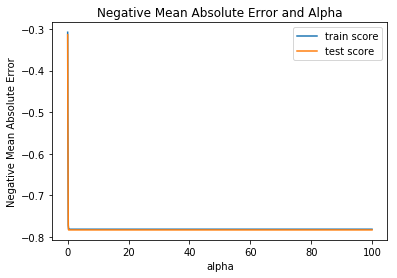

In [219]:
#Plotting mean test and train scores against alpha 
cv_results_lasso_rem['param_alpha'] = cv_results_lasso_rem['param_alpha'].astype('float32')

#Plotting the lines
plt.plot(cv_results_lasso_rem['param_alpha'], cv_results_lasso_rem['mean_train_score'])
plt.plot(cv_results_lasso_rem['param_alpha'], cv_results_lasso_rem['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [220]:
#Checking for the alpha value that gives the least mean_test_score

cv_results_lasso_rem.sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009601,5.987620e-03,0.0016,0.003200,0.0001,{'alpha': 0.0001},-0.286885,-0.333620,-0.328100,-0.293648,-0.326687,-0.313762,0.019471,1,-0.315336,-0.300161,-0.300954,-0.313587,-0.309039,-0.307816,0.006278
1,0.008001,4.422006e-07,0.0000,0.000000,0.0010,{'alpha': 0.001},-0.289147,-0.332078,-0.327223,-0.297225,-0.333467,-0.315802,0.018787,2,-0.317054,-0.300951,-0.302593,-0.315327,-0.310914,-0.309368,0.006538
2,0.006401,5.987671e-03,0.0032,0.003919,0.0100,{'alpha': 0.01},-0.317266,-0.333415,-0.345361,-0.329785,-0.370183,-0.339180,0.017899,3,-0.342842,-0.325960,-0.329534,-0.341234,-0.336824,-0.335279,0.006556
3,0.004800,3.919561e-03,0.0032,0.003919,0.0500,{'alpha': 0.05},-0.478512,-0.513122,-0.506765,-0.485017,-0.538071,-0.504272,0.021271,4,-0.508895,-0.499455,-0.497991,-0.502503,-0.499225,-0.501614,0.003932
4,0.011202,6.400466e-03,0.0016,0.003200,0.1000,{'alpha': 0.1},-0.578110,-0.591676,-0.566404,-0.569639,-0.623166,-0.585791,0.020618,5,-0.588615,-0.583440,-0.590152,-0.581885,-0.580482,-0.584914,0.003798


In [221]:
#Fitting the lasso regression model with the optimal alpha value

alpha = 0.0001

lasso_rem = Lasso(alpha=alpha)
        
lasso_rem.fit(lasso_X_train[remaining_cols], h1_y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [222]:
#Using r2_score to check R-squared values

#Predicting the train r2 score
h1_y_train_pred_lasso = lasso_rem.predict(lasso_X_train[remaining_cols])
print(r2_score(y_true = h1_y_train, y_pred = h1_y_train_pred_lasso))

#Predicting the test r2 score
h1_y_test_pred_lasso = lasso_rem.predict(lasso_X_test[remaining_cols])
print(r2_score(y_true = h1_y_test, y_pred = h1_y_test_pred_lasso))

0.8110815363825558
0.7715370851671592


Reducing the number of variables lowers the R-squared values of the train and test sets

In [223]:
lasso_rem_df = pd.DataFrame(data=zip(lasso_X_train[remaining_cols].columns, lasso_rem.coef_), columns = ['Variables', 'Coefficients'])

In [224]:
lasso_rem_df.sort_values('Coefficients', ascending=False)[0:5]

,Variables,Coefficients
5,GrLivArea,4.730063
2,LotArea,0.865736
7,FireplaceQu,0.491066
6,BsmtFullBath,0.465583
8,GarageType,0.303992


In [225]:
lasso_rem_df.sort_values('Coefficients', ascending=True)[0:5]

,Variables,Coefficients
11,PoolQC,-1.546036
12,BuildingAge,-0.998948
13,RemodAge,-0.608352
4,BsmtFinSF1,-0.114965
1,MSZoning,0.124941


The most important predictor variables in this model are: GrLivArea, PoolQC, BuildingAge, LotArea, RemodAge, and FirePlaceQu.